In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Project Overview

In this project, we performed various data analysis and preprocessing tasks on a dataset related to vessel performance. Below is a summary of the key steps and operations performed:

## Data Loading and Initial Exploration

1. **Loading Data**: We loaded multiple CSV files into pandas DataFrames for analysis.
2. **Initial Exploration**: We explored the data by printing the first few rows and checking the data types and summary statistics.

## Data Cleaning and Preprocessing

1. **Handling Missing Values**:
    - We identified columns with missing values and filled them using forward fill (`ffill`) method.
    - For columns with more than a certain percentage of missing values, we dropped those columns.
    - We replaced specific string values like 'True'/'False' with numerical values (1/0). (peerformed encoding)

2. **Parsing and Exploding JSON-like Columns**:
    - We parsed columns containing JSON-like strings into separate rows and columns for easier analysis.
    - We normalized the JSON data and created new DataFrames for detailed analysis.

3. **Feature Engineering**:
    - We created new features such as 'Fuel_Consumption_per_NM', 'PCA_AirTemperature', 'PCA_AirPressure', by performing calculations on existing columns.
    - We applied Principal Component Analysis (PCA) to reduce the dimensionality of certain features.

## Data Visualization

1. **Correlation Analysis**:
    - We calculated correlation matrices for selected numerical columns and visualized them using heatmaps.
    - We created scatter plots and box plots to visualize relationships between different variables.

2. **Distribution Analysis**:
    - We plotted histograms and KDE plots to analyze the distribution of key variables.
    - We created bar plots to visualize the distribution of fuel consumption by engine type and fuel type.

## Statistical Analysis

1. **Descriptive Statistics**:
    - We calculated summary statistics such as mean, median, and standard deviation for key variables.
    - We grouped data by specific categories and calculated averages for various fields.

## Machine Learning and Imputation

1. **Linear Regression**:
    - We trained a linear regression model to predict missing values in certain columns like finding 'SailedDistanceGPS','Enginerunninghours'.
    - We evaluated the model using metrics like Mean Squared Error (MSE) and R-squared (R²).

2. **Neural Network**:
    - We built and trained a neural network model to predict engine power based on fuel consumption.
    - We evaluated the model's performance using RMSE and R² metrics.

## Saving and Exporting Data

1. **Saving Cleaned Data**: We saved the cleaned and processed DataFrames back to CSV files for future use.
2. **Model Saving**: We saved the trained neural network model to a file for later use.

This project involved a comprehensive workflow of data cleaning, preprocessing, visualization, statistical analysis, and machine learning to gain insights and make predictions on vessel performance data.

In [3]:
file_path = 'c:/Users/tarun/Downloads/Assignment_vessels/flattened_vesselPerformance copy.csv'
df = pd.read_csv(file_path)

# # Display the first few rows of the DataFrame
# print(df.head())

   AirPressure  AirTemperature  AnchorageName  \
0       1016.0            21.0            NaN   
1          NaN             NaN            NaN   
2          NaN             NaN            NaN   
3          NaN             NaN            NaN   
4          NaN             NaN            NaN   

                                    AuxiliaryBlowers  AverageSpeedGPS  \
0  [{'Ampere': None, 'IDCode': 'AuxiliaryBlower3'...            11.92   
1                                                NaN              NaN   
2                                                 []              NaN   
3                                                 []              NaN   
4                                                 []              NaN   

   AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0            12.46       25650.0                            NaN   
1              NaN       25650.0                            NaN   
2              NaN       25650.0                            NaN  

In [4]:
print(df.dtypes)

AirPressure                       float64
AirTemperature                    float64
AnchorageName                     float64
AuxiliaryBlowers                   object
AverageSpeedGPS                   float64
                                   ...   
DraftNextPort.ExpectedDraftFwd    float64
DraftNextPort.ExpectedDraftMid    float64
DistanceToEosp                    float64
SailedDistance                    float64
Draft                             float64
Length: 174, dtype: object


- Here we plotted Line plots as they show trends in Air Pressure and Temperature over time, while histograms reveal their distributions, helping identify patterns, anomalies, and common value ranges for analysis.


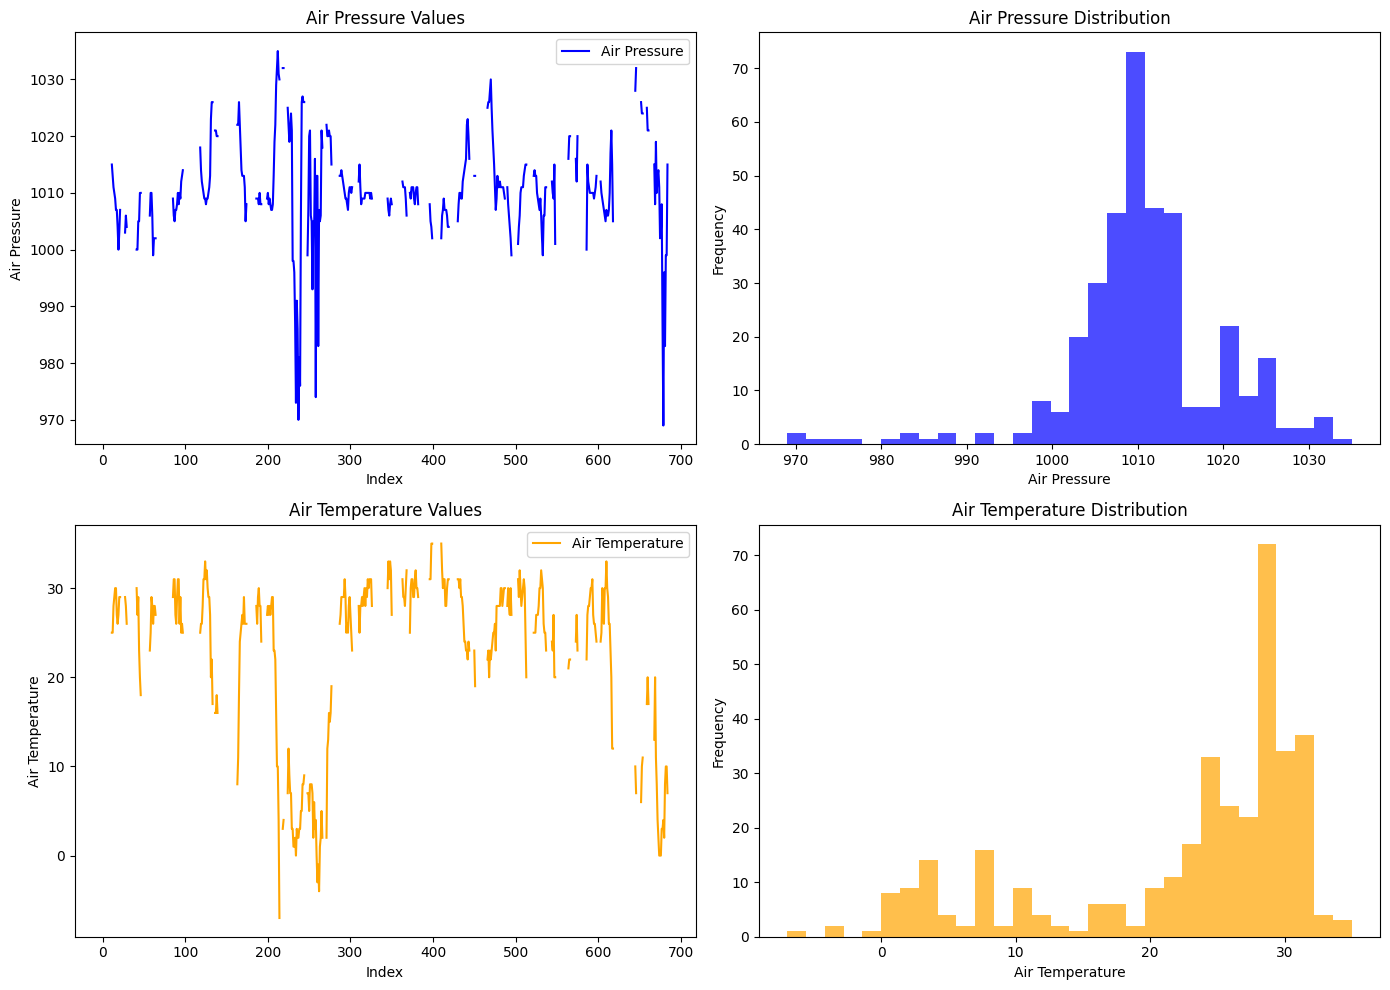

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(df['AirPressure'], label='Air Pressure', color='blue')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Air Pressure')
axs[0, 0].set_title('Air Pressure Values')
axs[0, 0].legend()

axs[1, 0].plot(df['AirTemperature'], label='Air Temperature', color='orange')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('Air Temperature')
axs[1, 0].set_title('Air Temperature Values')
axs[1, 0].legend()

axs[0, 1].hist(df['AirPressure'].dropna(), bins=30, color='blue', alpha=0.7)
axs[0, 1].set_xlabel('Air Pressure')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Air Pressure Distribution')

axs[1, 1].hist(df['AirTemperature'].dropna(), bins=30, color='orange', alpha=0.7)
axs[1, 1].set_xlabel('Air Temperature')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Air Temperature Distribution')

plt.tight_layout()
plt.show()

The box plots reveal variability in air pressure and temperature data, with pressure showing outliers on both ends and temperature predominantly on the lower end. These insights guide further analysis to explore variance and potential extreme values.  


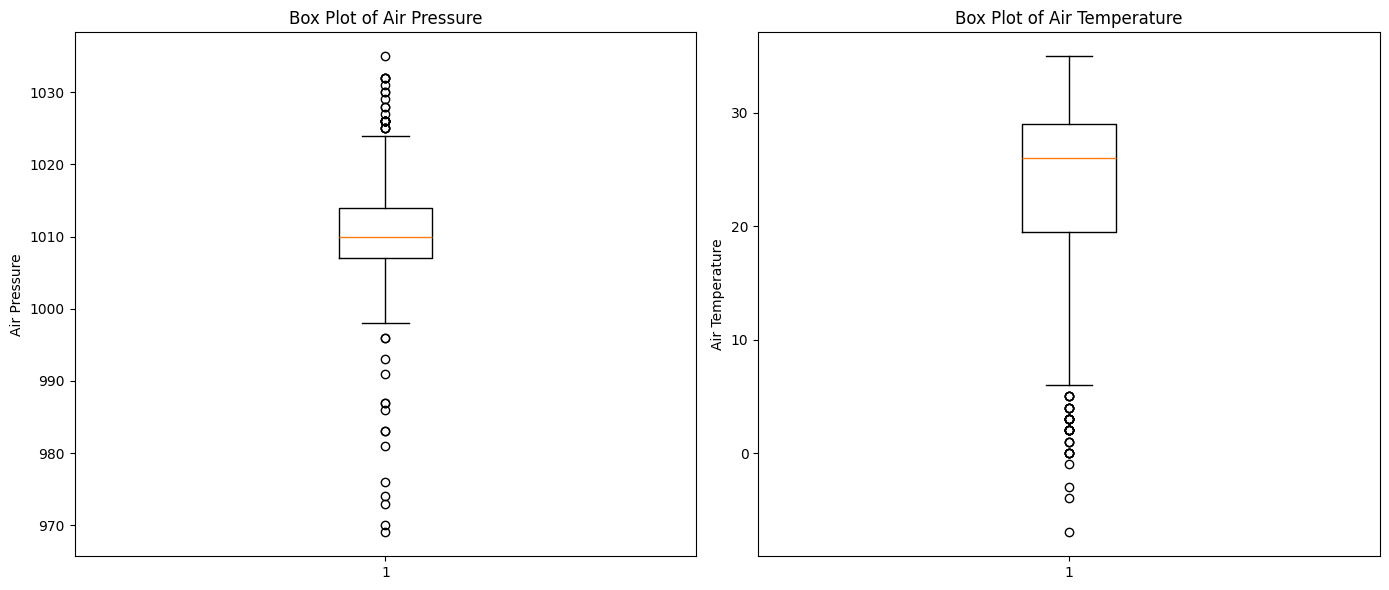

In [7]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].boxplot(df['AirPressure'].dropna())
axs[0].set_title('Box Plot of Air Pressure')
axs[0].set_ylabel('Air Pressure')

axs[1].boxplot(df['AirTemperature'].dropna())
axs[1].set_title('Box Plot of Air Temperature')
axs[1].set_ylabel('Air Temperature')

plt.tight_layout()
plt.show()

Descision on what basis we will be filling out nissing data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Calculate skewness
air_pressure_skewness = df['AirPressure'].skew()
air_temperature_skewness = df['AirTemperature'].skew()

# Calculate percentage of missing values
air_pressure_missing_percentage = df['AirPressure'].isnull().mean() * 100
air_temperature_missing_percentage = df['AirTemperature'].isnull().mean() * 100

# Print the parameters
print(f"Air Pressure Skewness: {air_pressure_skewness}")
print(f"Air Temperature Skewness: {air_temperature_skewness}")
print(f"Air Pressure Missing Percentage: {air_pressure_missing_percentage}%")
print(f"Air Temperature Missing Percentage: {air_temperature_missing_percentage}%")

if abs(air_pressure_skewness) < 0.5:
    print("Air Pressure: Data is symmetrically distributed. Consider replacing missing values with the mean.")
else:
    print("Air Pressure: Data is skewed. Consider replacing missing values with the median.")

if abs(air_temperature_skewness) < 0.5:
    print("Air Temperature: Data is symmetrically distributed. Consider replacing missing values with the mean.")
else:
    print("Air Temperature: Data is skewed. Consider replacing missing values with the median.")

if air_pressure_missing_percentage > 20:
    print("Air Pressure: High percentage of missing values. Consider removing rows with missing values.")
else:
    print("Air Pressure: Low percentage of missing values. Consider replacing missing values with the mean or median.")

if air_temperature_missing_percentage > 20:
    print("Air Temperature: High percentage of missing values. Consider removing rows with missing values.")
else:
    print("Air Temperature: Low percentage of missing values. Consider replacing missing values with the mean or median.")

Air Pressure Skewness: -0.9153867381013948
Air Temperature Skewness: -1.1778523820450288
Air Pressure Missing Percentage: 48.175182481751825%
Air Temperature Missing Percentage: 48.175182481751825%
Air Pressure: Data is skewed. Consider replacing missing values with the median.
Air Temperature: Data is skewed. Consider replacing missing values with the median.
Air Pressure: High percentage of missing values. Consider removing rows with missing values.
Air Temperature: High percentage of missing values. Consider removing rows with missing values.


In [ ]:
# # Remove rows with missing values
# df.dropna(subset=['AirPressure', 'AirTemperature'], inplace=True)

# # Verify the changes
# print(df.isnull().sum())

Incomplete rows in the specified column were identified and removed, leaving only complete data for accurate and meaningful analysis.  







In [ ]:
# Function to remove the third dictionary from the list
def remove_third_dict(generator_list):
	if isinstance(generator_list, list) and len(generator_list) > 2:
		del generator_list[2]
	return generator_list

# Apply the function to the 'Generators' column
df['Generators'] = df['Generators'].apply(lambda x: eval(x) if isinstance(x, str) else x).apply(remove_third_dict)

# Save the modified DataFrame to a new CSV file
new_file_path = 'c:/Users/tarun/Downloads/Assignment_vessels/flattened_vesselPerformance_modified.csv'
df.to_csv(new_file_path, index=False)

In [18]:
df['Consumptions'].dtype

dtype('O')

### Conclusions  
- **Main Engine Dominance**: Most fuel consumption is attributed to the main engine.  
- **Fuel Preference**: VLSFO is the most commonly used fuel, especially for main engines.  
- **Low Auxiliary Consumption**: Auxiliary engines and boilers use minimal fuel.  
- **Fuel-Engine Relation**: Fuel type varies based on engine function.  
- **Consumption Variability**: Main engine fuel consumption varies significantly with operating conditions.  


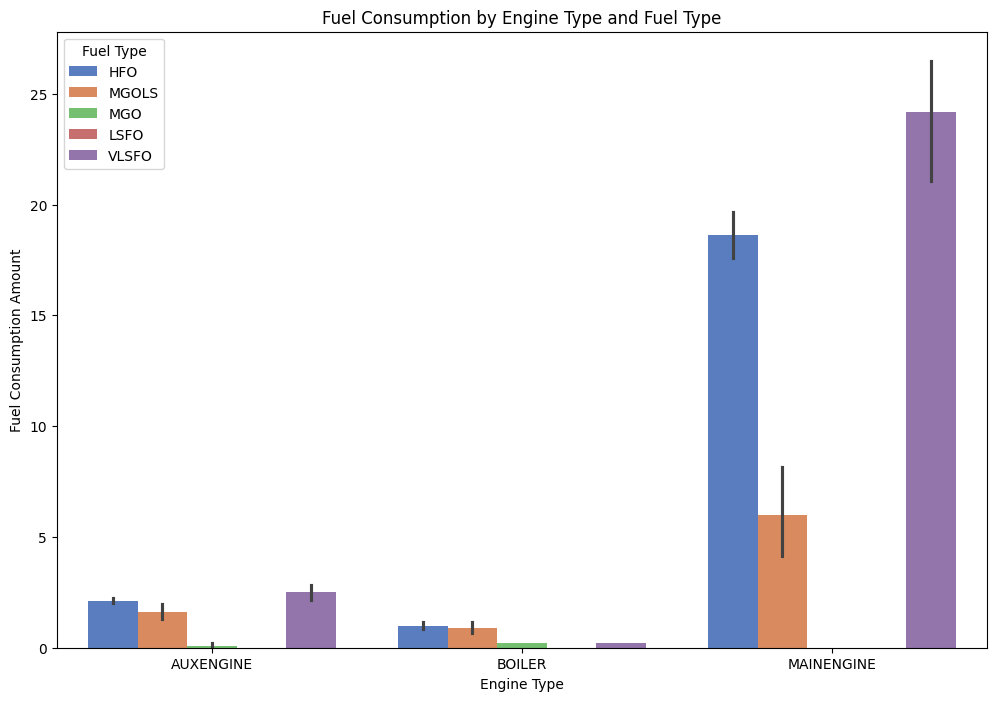

In [250]:
import ast
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Consumptions'] = df['Consumptions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_exploded = df.explode('Consumptions')

# Normalize the JSON data in the 'Consumptions' column
consumptions = pd.json_normalize(df_exploded['Consumptions'])

engine_types = consumptions[consumptions['ConsumptionTypeIDCode'].isin(['MAINENGINE', 'AUXENGINE', 'BOILER'])]

plt.figure(figsize=(12, 8))
sns.barplot(data=engine_types, x='ConsumptionTypeIDCode', y='Amount', hue='FuelTypeIDCode', palette='muted')
plt.title('Fuel Consumption by Engine Type and Fuel Type')
plt.xlabel('Engine Type')
plt.ylabel('Fuel Consumption Amount')
plt.legend(title='Fuel Type')
plt.show()



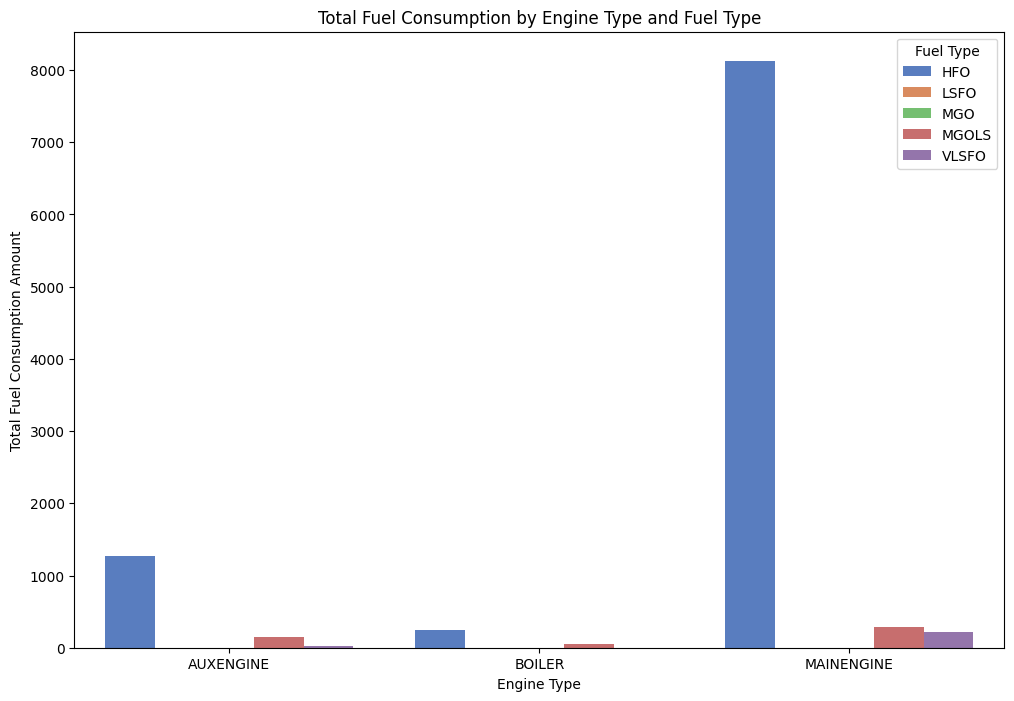

In [ ]:
engine_types = consumptions[consumptions['ConsumptionTypeIDCode'].isin(['MAINENGINE', 'AUXENGINE', 'BOILER'])]

# Group by ConsumptionTypeIDCode and FuelTypeIDCode and sum the Amount
grouped_data = engine_types.groupby(['ConsumptionTypeIDCode', 'FuelTypeIDCode'], as_index=False)['Amount'].sum()
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='ConsumptionTypeIDCode', y='Amount', hue='FuelTypeIDCode', palette='muted')
plt.title('Total Fuel Consumption by Engine Type and Fuel Type')
plt.xlabel('Engine Type')
plt.ylabel('Total Fuel Consumption Amount')
plt.legend(title='Fuel Type')
plt.show()

We have focused on FuelRobs as it contains nested data

In [ ]:
import pandas as pd
import ast


# Parse the string representation to an actual list of dictionaries
# df['FuelRobs'] = df['FuelRobs'].apply(ast.literal_eval)

# Explode the FuelRobs column to separate the list of dictionaries into individual rows
df_exploded = df.explode('FuelRobs')

# Normalize the JSON data in the FuelRobs column
fuel_robs = pd.json_normalize(df_exploded['FuelRobs'])

# Save the new DataFrame to a new CSV file
fuel_robs.to_csv('fuel_robs_expanded.csv', index=False)


### Distribution of Non-Zero Fuel Amounts by Fuel Type
- Filtered out zero fuel values for accurate analysis.
- Visualized fuel distribution with KDE plots for each fuel type to identify usage patterns.

### Observations and Analysis
1. **HFO (Heavy Fuel Oil)**
   - **Skewness**: Moderately skewed towards lower values.

2. **MGOLS (Marine Gas Oil Low Sulfur)**
   - **Skewness**: Negative skew with a dominant smaller-value peak.

3. **VLSFO (Very Low Sulfur Fuel Oil)**
   - **Skewness**: Slight negative skew.

### Conclusions
- **Consumption Patterns**: HFO shows diverse patterns, MGOLS has dual modes, and VLSFO has consistent usage.
- **Range Differences**: HFO has the widest range; VLSFO, the narrowest.
- **Operational Insights**: Peaks in HFO and MGOLS suggest different operational modes. VLSFO shows uniform consumption.
  
### Suggestions for Industry based on data
- **Optimize fuels**: Adjust engine settings based on the below consumption patterns
- **Maximize Efficiency**: Monitor fuels consumption to reduce waste.
- **Dynamic Fuel Switching**: Automate fuel switching based on operational conditions.
- **Fuel Inventory Management**: Track fuel usage to optimize stock and reduce waste.

These strategies can help optimize fuel consumption, reduce operational costs, and minimize environmental impact.


C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3561108505.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=fuel_robs_non_zero[fuel_robs_non_zero['FuelOilTypeIDCode'] == fuel_type], x='Amount', fill=True, common_norm=False, palette=palette)
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3561108505.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=fuel_robs_non_zero[fuel_robs_non_zero['FuelOilTypeIDCode'] == fuel_type], x='Amount', fill=True, common_norm=False, palette=palette)
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3561108505.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Fuel Oil Type')


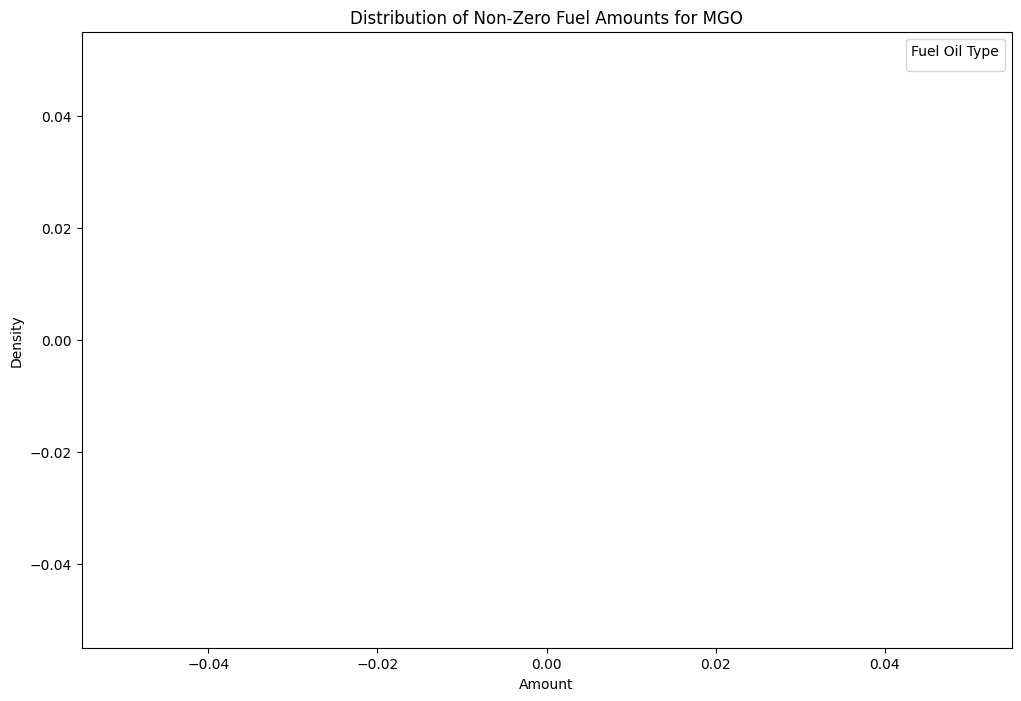

C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3561108505.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=fuel_robs_non_zero[fuel_robs_non_zero['FuelOilTypeIDCode'] == fuel_type], x='Amount', fill=True, common_norm=False, palette=palette)
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3561108505.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Fuel Oil Type')


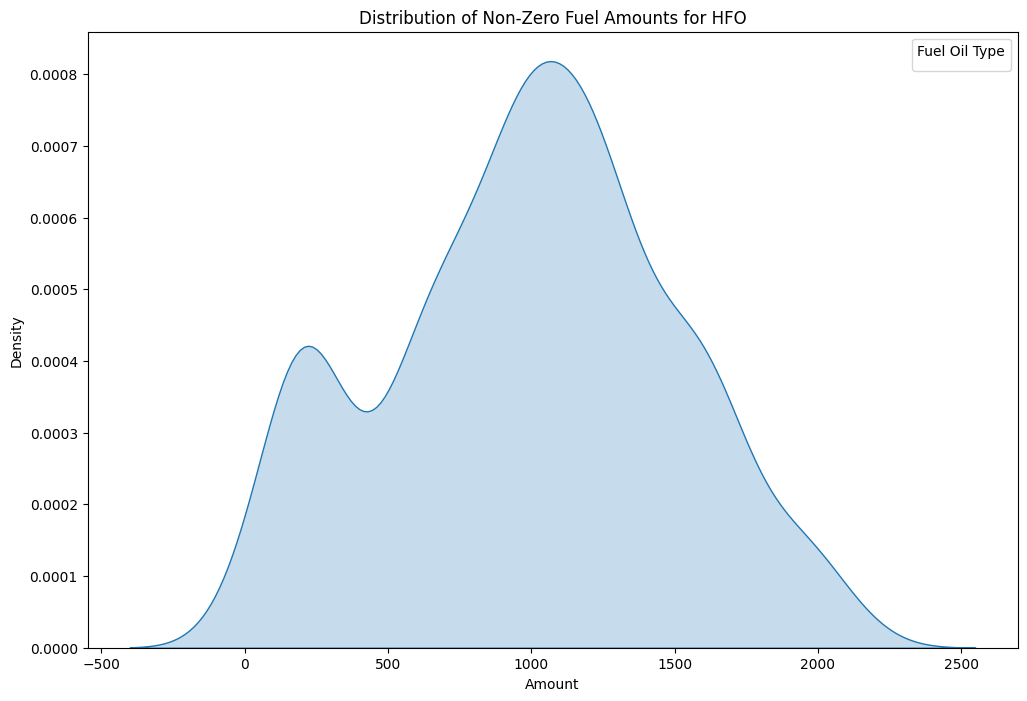

C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3561108505.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=fuel_robs_non_zero[fuel_robs_non_zero['FuelOilTypeIDCode'] == fuel_type], x='Amount', fill=True, common_norm=False, palette=palette)
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3561108505.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Fuel Oil Type')


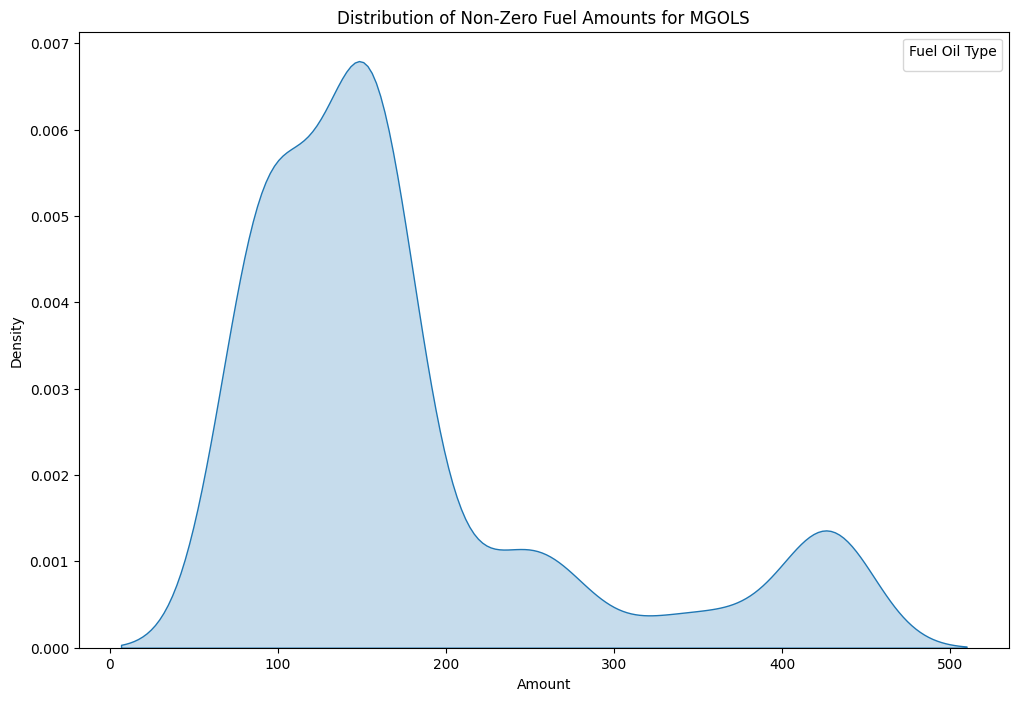

C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3561108505.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=fuel_robs_non_zero[fuel_robs_non_zero['FuelOilTypeIDCode'] == fuel_type], x='Amount', fill=True, common_norm=False, palette=palette)
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3561108505.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Fuel Oil Type')


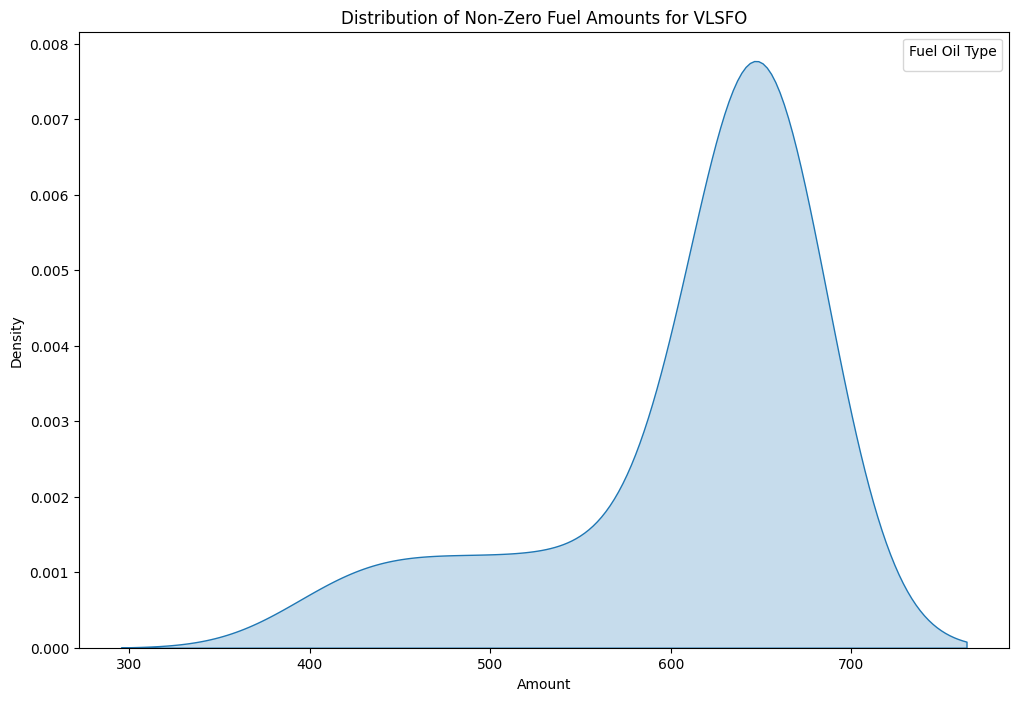

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into a DataFrame
file_path = 'c:/Users/tarun/Downloads/Assignment_vessels/fuel_robs_expanded.csv'
df = pd.read_csv(file_path)

# Filter out rows where Amount is zero
fuel_robs_non_zero = df[df['Amount'] > 0]
# Plot the distribution curves for each fuel type separately using KDE plots
fuel_types = fuel_robs_non_zero['FuelOilTypeIDCode'].unique()

for fuel_type in fuel_types:
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data=fuel_robs_non_zero[fuel_robs_non_zero['FuelOilTypeIDCode'] == fuel_type], x='Amount', fill=True, common_norm=False, palette=palette)
    plt.title(f'Distribution of Non-Zero Fuel Amounts for {fuel_type}')
    plt.xlabel('Amount')
    plt.ylabel('Density')
    plt.legend(title='Fuel Oil Type')
    plt.show()


C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\1589600940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fuel_robs_zero, x='FuelOilTypeIDCode', palette='muted')


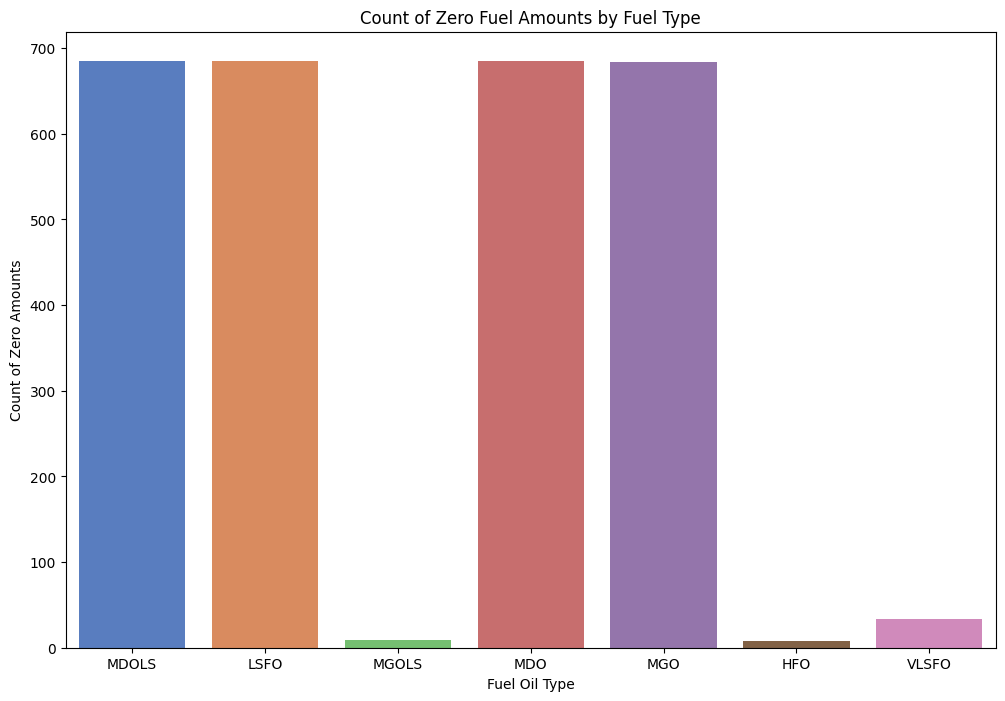

In [51]:
# Filter rows where Amount is zero
fuel_robs_zero = df[df['Amount'] == 0]

# Plot the count of zero values by FuelOilTypeIDCode
plt.figure(figsize=(12, 8))
sns.countplot(data=fuel_robs_zero, x='FuelOilTypeIDCode', palette='muted')
plt.title('Count of Zero Fuel Amounts by Fuel Type')
plt.xlabel('Fuel Oil Type')
plt.ylabel('Count of Zero Amounts')
plt.show()

### Box Plot Analysis - Fuel Consumption

**Key Insights:**

- **Low Consumption Fuels**: MGO, MDOLS, LSFO, and MDO 
- **Higher Consumption Fuels**: 
  - **MGOLS**: Slightly higher median with small spread, outliers observed.
  - **HFO**: Dominates with the highest median, large variability, and significant outliers.

  
**Key Observations:**
- **HFO** :most used fuel
- **Disparity in Usage**: Fuels like HFO and VLSFO are used significantly more than MGO, MDOLS, and others.

**Implications & Recommendations:**
- **Dominance of HFO** suggests it is likely the primary fuel for propulsion, while VLSFO is used less frequently.




C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\1051777120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FuelOilTypeIDCode', y='Amount', palette='muted')


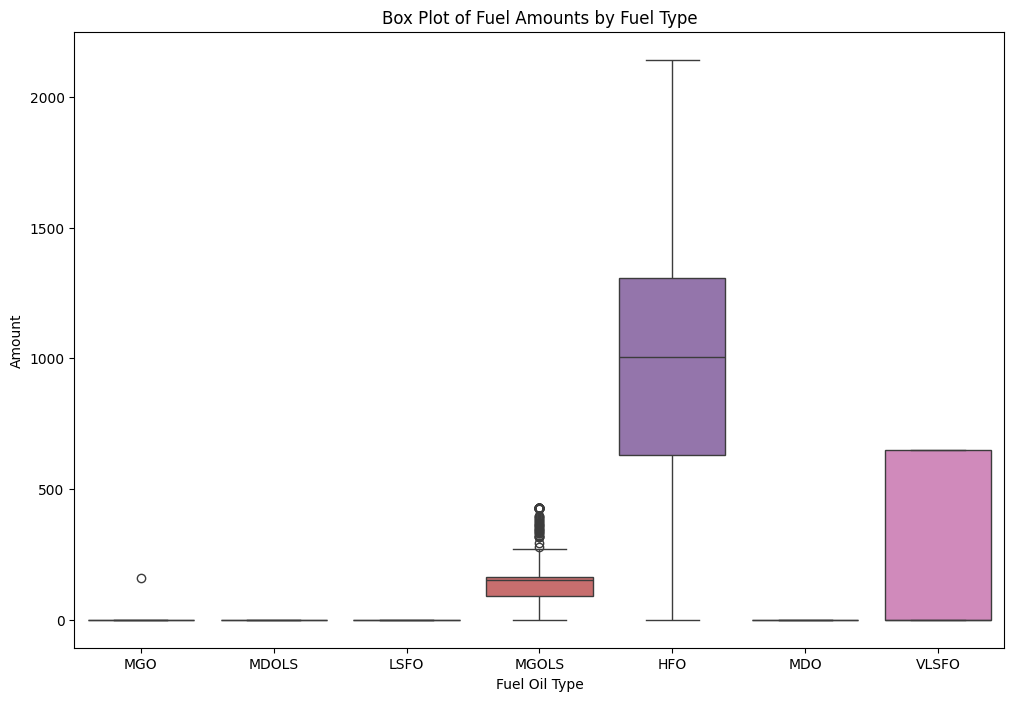

In [52]:
# box plot of fuel amounts by FuelOilTypeIDCode
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='FuelOilTypeIDCode', y='Amount', palette='muted')
plt.title('Box Plot of Fuel Amounts by Fuel Type')
plt.xlabel('Fuel Oil Type')
plt.ylabel('Amount')
plt.show()

Consumption Data Stats:
          Amount  LowerCalorificValue   Sulphur  Temperature  Viscosity  \
count  10.000000             8.000000  8.000000     8.000000   8.000000   
mean    2.880000            30.532500  1.572250    88.750000   9.000000   
std     7.439952            18.858992  1.280643    63.659249   6.928203   
min     0.000000             0.000000  0.000000     0.000000   0.000000   
25%     0.000000            30.270000  0.058500    30.000000   1.500000   
50%     0.100000            40.360000  2.500000   134.000000  14.000000   
75%     1.125000            40.360000  2.500000   134.000000  14.000000   
max    23.900000            42.460000  2.500000   134.000000  14.000000   

          Vessel  
count  10.000000  
mean    1.500000  
std     0.527046  
min     1.000000  
25%     1.000000  
50%     1.500000  
75%     2.000000  
max     2.000000  

FuelRobs Data Stats:
            Amount     Vessel
count    12.000000  12.000000
mean    246.716667   1.500000
std     505.00233

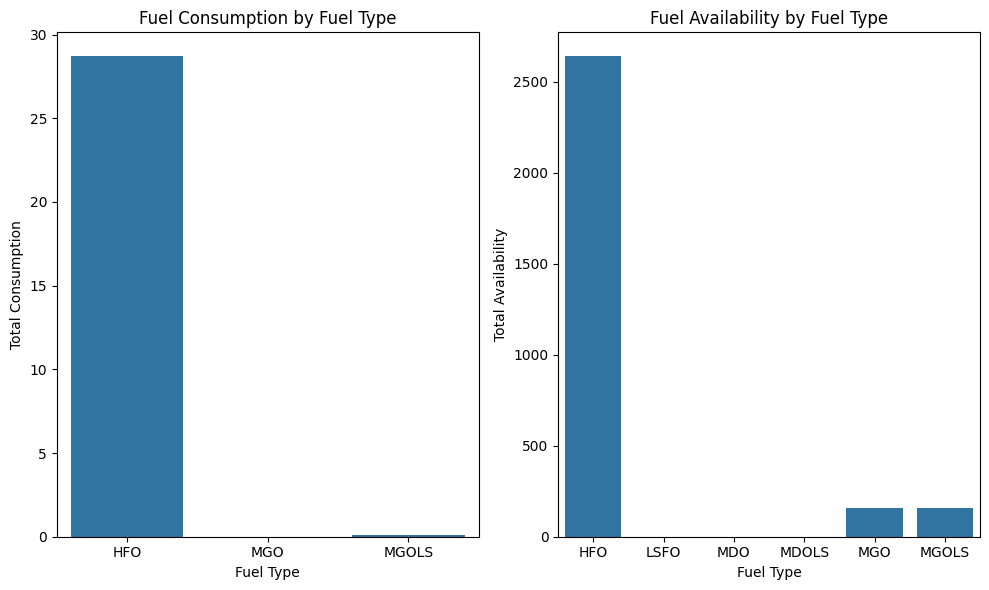

In [72]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data - Replace with your actual data
consumptions_data = [
    [{'Amount': 2.8, 'ConsumptionTypeIDCode': 'AUXENGINE', 'FuelTypeIDCode': 'HFO', 'LowerCalorificValue': 40.36, 'Sulphur': 2.5, 'Temperature': 134.0, 'Viscosity': 14.0},
     {'Amount': 0.1, 'ConsumptionTypeIDCode': 'BOILER', 'FuelTypeIDCode': 'MGOLS', 'LowerCalorificValue': 42.46, 'Sulphur': 0.078, 'Temperature': 40.0, 'Viscosity': 2.0},
     {'Amount': 0.0, 'ConsumptionTypeIDCode': 'MAINENGINE', 'FuelTypeIDCode': 'MGOLS', 'LowerCalorificValue': 0.0, 'Sulphur': 0.0, 'Temperature': 0.0, 'Viscosity': 0.0},
     {'Amount': 23.9, 'ConsumptionTypeIDCode': 'MAINENGINE', 'FuelTypeIDCode': 'HFO', 'LowerCalorificValue': 40.36, 'Sulphur': 2.5, 'Temperature': 134.0, 'Viscosity': 14.0},
     {'Amount': 0.0, 'ConsumptionTypeIDCode': 'MAINENGINE', 'FuelTypeIDCode': 'MGO', 'LowerCalorificValue': 0.0, 'Sulphur': 0.0, 'Temperature': 0.0, 'Viscosity': 0.0}],
    [{'Amount': 0.6, 'ConsumptionTypeIDCode': 'AUXENGINE', 'FuelTypeIDCode': 'HFO', 'LowerCalorificValue': 40.36, 'Sulphur': 2.5, 'Temperature': 134.0, 'Viscosity': 14.0},
     {'Amount': 0.0, 'ConsumptionTypeIDCode': 'AUXENGINE', 'FuelTypeIDCode': 'MGO', 'LowerCalorificValue': None, 'Sulphur': None, 'Temperature': None, 'Viscosity': None},
     {'Amount': 0.0, 'ConsumptionTypeIDCode': 'AUXENGINE', 'FuelTypeIDCode': 'MGOLS', 'LowerCalorificValue': None, 'Sulphur': None, 'Temperature': None, 'Viscosity': None},
     {'Amount': 0.1, 'ConsumptionTypeIDCode': 'BOILER', 'FuelTypeIDCode': 'HFO', 'LowerCalorificValue': 40.36, 'Sulphur': 2.5, 'Temperature': 134.0, 'Viscosity': 14.0},
     {'Amount': 1.3, 'ConsumptionTypeIDCode': 'MAINENGINE', 'FuelTypeIDCode': 'HFO', 'LowerCalorificValue': 40.36, 'Sulphur': 2.5, 'Temperature': 134.0, 'Viscosity': 14.0}]
]

fuelrobs_data = [
    [{'FuelOilTypeIDCode': 'MGO', 'Amount': 160.4}, {'FuelOilTypeIDCode': 'MDOLS', 'Amount': 0.0}, {'FuelOilTypeIDCode': 'LSFO', 'Amount': 0.0},
     {'FuelOilTypeIDCode': 'MGOLS', 'Amount': 0.0}, {'FuelOilTypeIDCode': 'HFO', 'Amount': 1320.9}, {'FuelOilTypeIDCode': 'MDO', 'Amount': 0.0}],
    [{'FuelOilTypeIDCode': 'MDOLS', 'Amount': 0.0}, {'FuelOilTypeIDCode': 'MGOLS', 'Amount': 160.4}, {'FuelOilTypeIDCode': 'MDO', 'Amount': 0.0},
     {'FuelOilTypeIDCode': 'HFO', 'Amount': 1318.9}, {'FuelOilTypeIDCode': 'MGO', 'Amount': 0.0}, {'FuelOilTypeIDCode': 'LSFO', 'Amount': 0.0}]
]

# Flattening Consumptions
consumptions_flat = []
for i, row in enumerate(consumptions_data):
    for entry in row:
        entry['Vessel'] = i+1  # Vessel identifier
        consumptions_flat.append(entry)

consumptions_df = pd.DataFrame(consumptions_flat)

# Flattening FuelRobs
fuelrobs_flat = []
for i, row in enumerate(fuelrobs_data):
    for entry in row:
        entry['Vessel'] = i+1  # Vessel identifier
        fuelrobs_flat.append(entry)

fuelrobs_df = pd.DataFrame(fuelrobs_flat)

# Merge Consumptions and FuelRobs Data on 'Vessel'
merged_df = pd.merge(consumptions_df, fuelrobs_df, left_on=['Vessel', 'FuelTypeIDCode'], right_on=['Vessel', 'FuelOilTypeIDCode'], how='outer')

# Descriptive Statistics
consumption_stats = consumptions_df.describe()
fuelrobs_stats = fuelrobs_df.describe()

print("Consumption Data Stats:")
print(consumption_stats)
print("\nFuelRobs Data Stats:")
print(fuelrobs_stats)

# Fuel Consumption Analysis
consumption_by_fuel = consumptions_df.groupby('FuelTypeIDCode')['Amount'].sum()
print("\nFuel Consumption by Fuel Type:")
print(consumption_by_fuel)

# Fuel Availability Analysis
fuel_availability = fuelrobs_df.groupby('FuelOilTypeIDCode')['Amount'].sum()
print("\nFuel Availability by Fuel Type:")
print(fuel_availability)

# Plotting
plt.figure(figsize=(10, 6))

# Fuel Consumption by Fuel Type
plt.subplot(1, 2, 1)
sns.barplot(x=consumption_by_fuel.index, y=consumption_by_fuel.values)
plt.title("Fuel Consumption by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Total Consumption")

# Fuel Availability by Fuel Type
plt.subplot(1, 2, 2)
sns.barplot(x=fuel_availability.index, y=fuel_availability.values)
plt.title("Fuel Availability by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Total Availability")

plt.tight_layout()
plt.show()


In [81]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = 'c:/Users/tarun/Downloads/Assignment_vessels/Truefalse.csv'
df = pd.read_csv(file_path)

# Columns to modify
columns_to_modify = [
    'IsCombinatorMode', 'IsFuelChangeover', 'IsPositionWarningOverridden',
    'IsShaftGeneratorRunning', 'IsSlowSteaming', 'IsTurboChargerCutOut', 'WindDirectionIsVariable'
]

# Replace True/TRUE with 1, False/FALSE with 0, and null values with 0
df[columns_to_modify] = df[columns_to_modify].replace({'True': 1, 'TRUE': 1, 'False': 0, 'FALSE': 0, pd.NA: 0, None: 0}).fillna(0)

# Save the modified DataFrame back to the same CSV file
df.to_csv(file_path, index=False)

# Verify the changes
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Users/tarun/Downloads/Assignment_vessels/flattened_modified.csv'

In [ ]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = 'c:/Users/tarun/Downloads/Assignment_vessels/Truefalse.csv'
df = pd.read_csv(file_path)

# Columns to modify
columns_to_modify = [
    'IsCombinatorMode', 'IsFuelChangeover', 'IsPositionWarningOverridden',
    'IsShaftGeneratorRunning', 'IsSlowSteaming', 'IsTurboChargerCutOut', 'WindDirectionIsVariable'
]

print(df[columns_to_modify].dtypes)
df[columns_to_modify] = df[columns_to_modify].astype(str)
print(df[columns_to_modify].dtypes)

df[columns_to_modify] = df[columns_to_modify].replace({'True': 1, 'TRUE': 1, 'False': 0, 'FALSE': 0, pd.NA: 0, None: 0}).fillna(0)

df.to_csv(file_path, index=False)

print(df.head())

IsCombinatorMode               object
IsFuelChangeover               object
IsPositionWarningOverridden    object
IsShaftGeneratorRunning        object
IsSlowSteaming                 object
IsTurboChargerCutOut           object
WindDirectionIsVariable        object
dtype: object
IsCombinatorMode               object
IsFuelChangeover               object
IsPositionWarningOverridden    object
IsShaftGeneratorRunning        object
IsSlowSteaming                 object
IsTurboChargerCutOut           object
WindDirectionIsVariable        object
dtype: object
  IsCombinatorMode IsFuelChangeover IsPositionWarningOverridden  \
0                0                0                           0   
1                0                0                           0   
2                0                0                           0   
3                0                0                           0   
4                0                0                           0   

  IsShaftGeneratorRunning IsSlowSteam

Plotted some corelations matrix to see the relations and patterns in the data

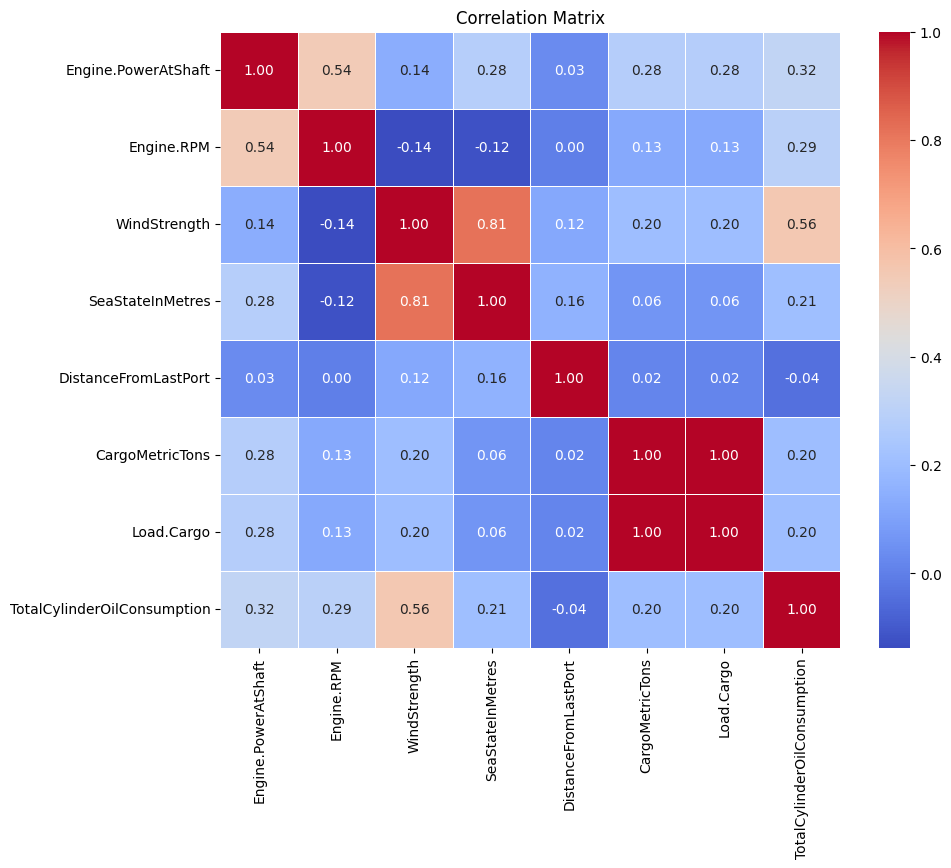

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\flattened_vesselPerformance copy.csv'
df = pd.read_csv(file_path)


selected_columns = [
    'Engine.PowerAtShaft', 
    'Engine.RPM', 
    'WindStrength', 
    'SeaStateInMetres', 
    'DistanceFromLastPort', 
    'CargoMetricTons', 
    'Load.Cargo',
    'TotalCylinderOilConsumption'
]

df_selected = df[selected_columns]

corr_matrix = df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


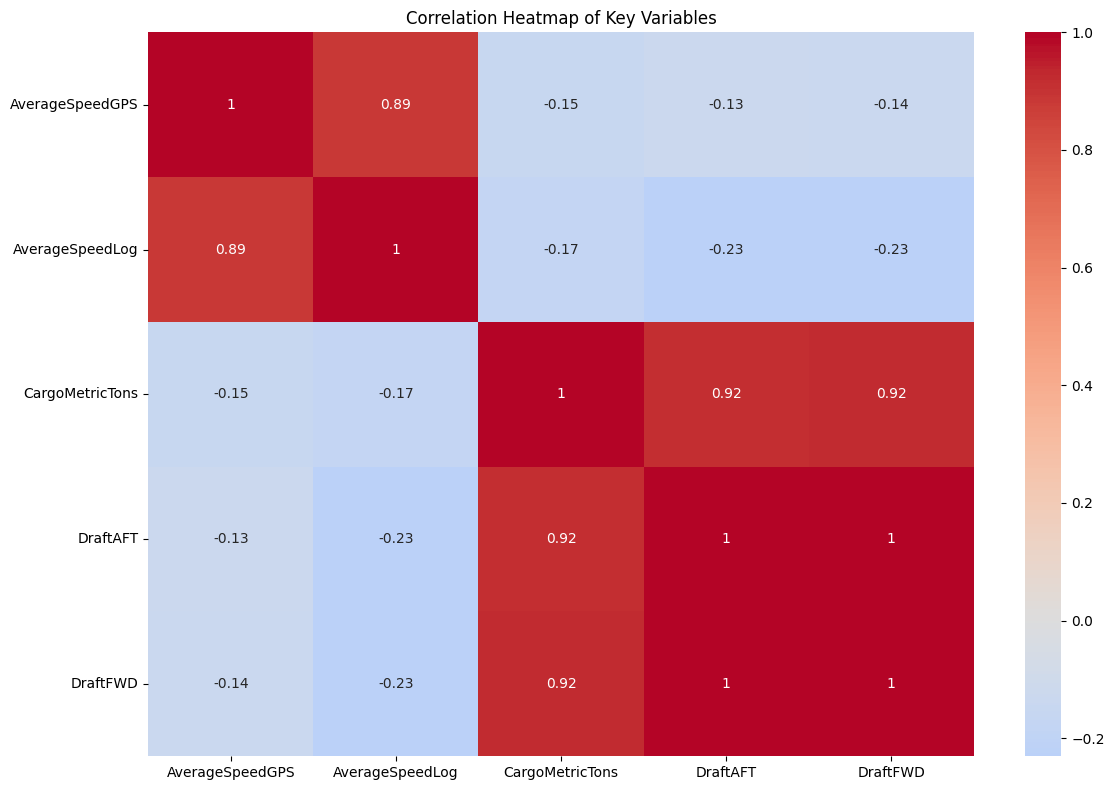

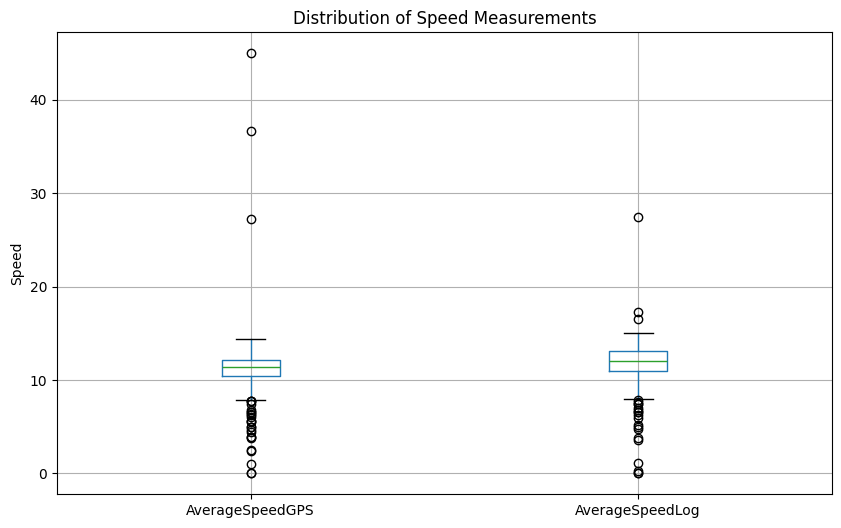

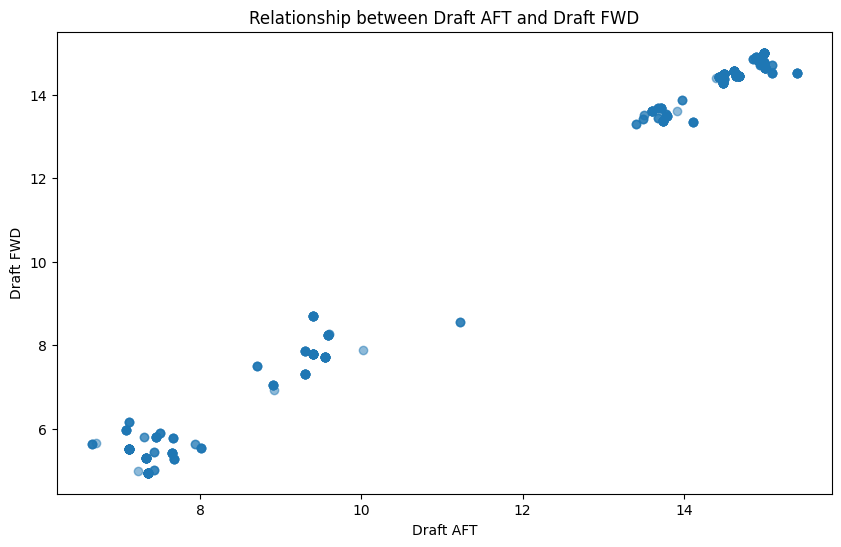

In [92]:

file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\flattened_vesselPerformance copy.csv'
data = pd.read_csv(file_path)

plt.figure(figsize=(12, 8))
selected_columns = ['AverageSpeedGPS', 'AverageSpeedLog', 'CargoMetricTons', 'DraftAFT', 'DraftFWD']
correlation_matrix = data[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key Variables')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
data[['AverageSpeedGPS', 'AverageSpeedLog']].boxplot()
plt.title('Distribution of Speed Measurements')
plt.ylabel('Speed')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['DraftAFT'], data['DraftFWD'], alpha=0.5)
plt.xlabel('Draft AFT')
plt.ylabel('Draft FWD')
plt.title('Relationship between Draft AFT and Draft FWD')
plt.show()

Dropped the columns with more that 70% if the missing data as we cannot use it for our analysis nor reconstruct the data back properly 

In [ ]:

file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\exp.csv'
df = pd.read_csv(file_path)

# Calculate the threshold for 70% missing values
threshold = len(df) * 0.7

df_cleaned = df.dropna(thresh=len(df) - threshold, axis=1)

df_cleaned.to_csv(file_path, index=False)

# Verify the changes
print("Columns after dropping those with more than 70% missing values:")
print(df_cleaned.columns)

Columns after dropping those with more than 70% missing values:
Index(['AirPressure', 'AirTemperature', 'AuxiliaryBlowers', 'AverageSpeedGPS',
       'AverageSpeedLog', 'BallastWater', 'BoilerIsExhaustBypassActive',
       'CargoMetricTons', 'ChartererSpeedOrder', 'ChiefEngineerName',
       ...
       'AirTemperature_Z', 'IsCombinatorMode_False', 'IsFuelChangeover_False',
       'IsFuelChangeover_True', 'IsPositionWarningOverridden_False',
       'IsPositionWarningOverridden_True', 'IsShaftGeneratorRunning_False',
       'IsSlowSteaming_False', 'IsTurboChargerCutOut_False',
       'IsTurboChargerCutOut_True'],
      dtype='object', length=106)


In [ ]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\flattened_vesselPerformance_modified copy.csv'
df = pd.read_csv(file_path)

# Drop columns with more than 75% missing values
df_cleaned = df.dropna(thresh=len(df) * 0.75, axis=1)

# Save the cleaned DataFrame back to the same CSV file
df_cleaned.to_csv(file_path, index=False)

# Verify the changes
print("Columns after dropping those with more than 75% missing values:")
print(df_cleaned.columns)

Columns after dropping those with more than 60% missing values:
Index(['AuxiliaryBlowers', 'BallastWater', 'BoilerIsExhaustBypassActive',
       'ChiefEngineerName', 'Consumptions', 'Containers', 'DraftMid',
       'EngineDriftingStoppageTime', 'FuelRobs', 'Generators', 'ID',
       'MasterName', 'OtherRobs', 'PerformanceCodes', 'Reefers',
       'TotalCylinderOilConsumption', 'TotalCylinderOilSpecificConsumption',
       'WindDirectionIsVariable', 'Boilers', 'EtaNextPort', 'FromPortID',
       'FromPortCode', 'Guid', 'IsDeleted', 'LocalTime', 'MainEngines',
       'ReportingPeriod', 'ReportTypeIDCode', 'ShaftGenerators',
       'TimeZoneInfo', 'ToPortID', 'ToPortCode', 'UtcTime', 'ValidationDate',
       'VersionStamp', 'VesselID', 'VoyageNumber', 'SpecialVoyages',
       'CIIConsumptions', 'Engine.PowerAtShaftRelative', 'Engine.RunningHours',
       'Engine.SpeedThroughWater', 'Engine.SpeedOverGround',
       'Latitude.Minutes', 'Latitude.Degrees', 'Latitude.Direction',
       'Longi

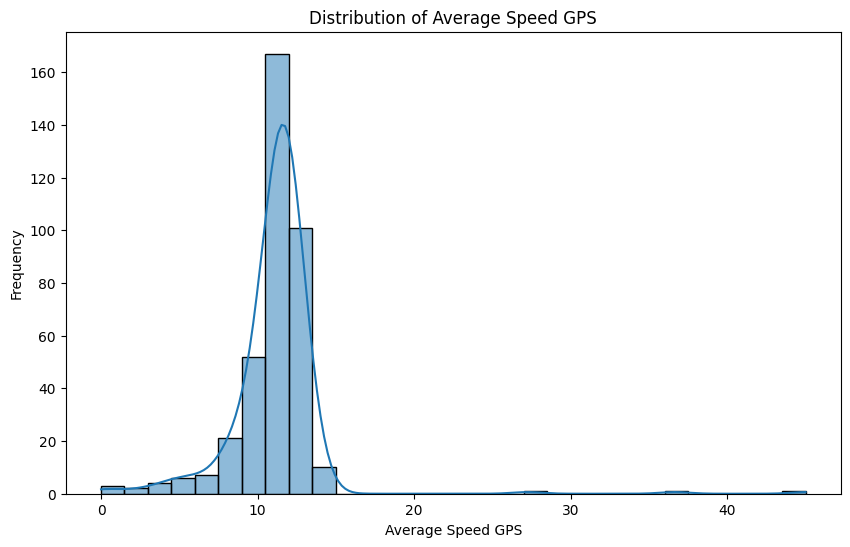

In [111]:
#distribution of 'AverageSpeedGPS' using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['AverageSpeedGPS'].dropna(), bins=30, kde=True)
plt.title('Distribution of Average Speed GPS')
plt.xlabel('Average Speed GPS')
plt.ylabel('Frequency')
plt.show()

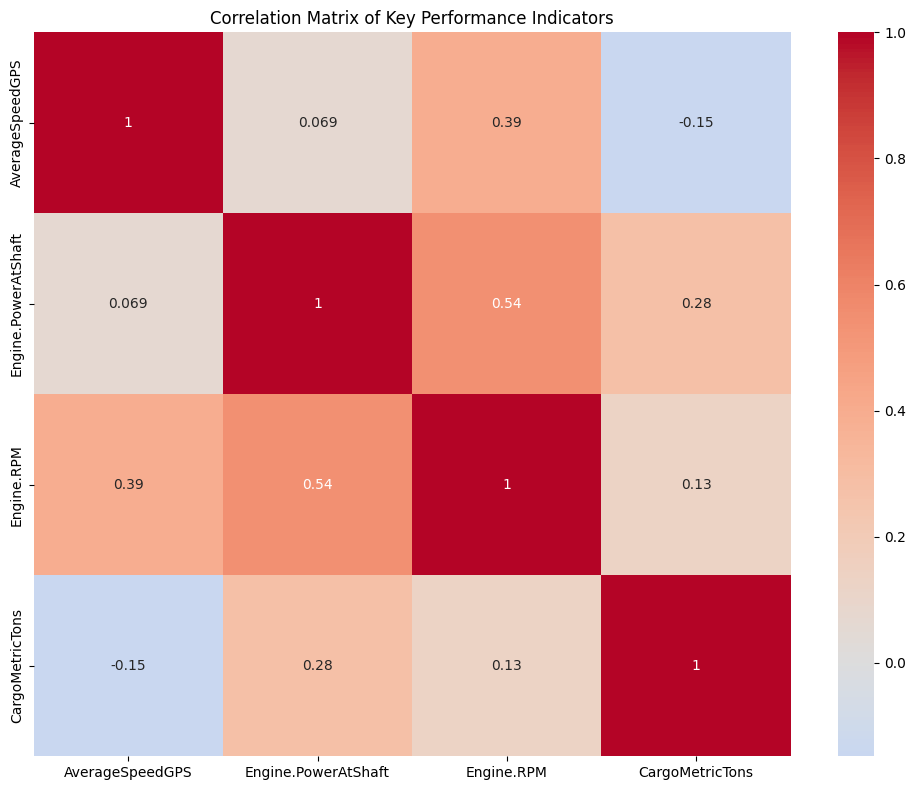

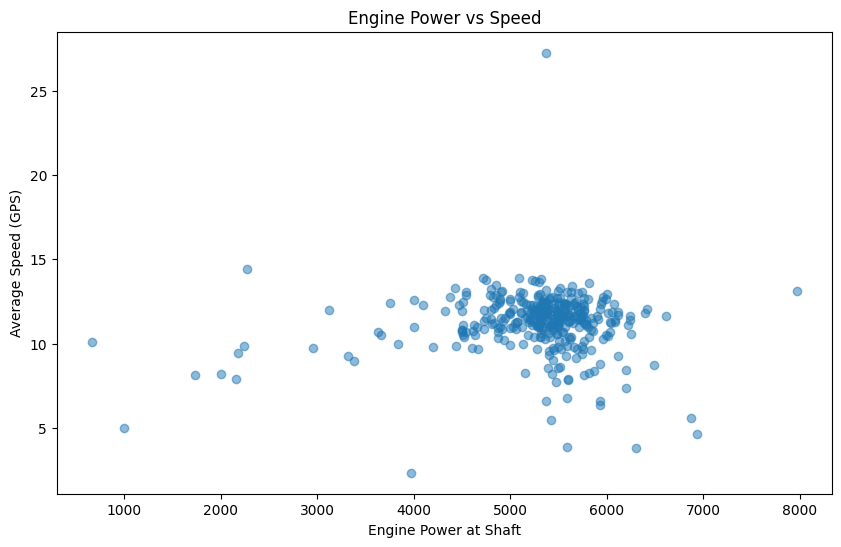

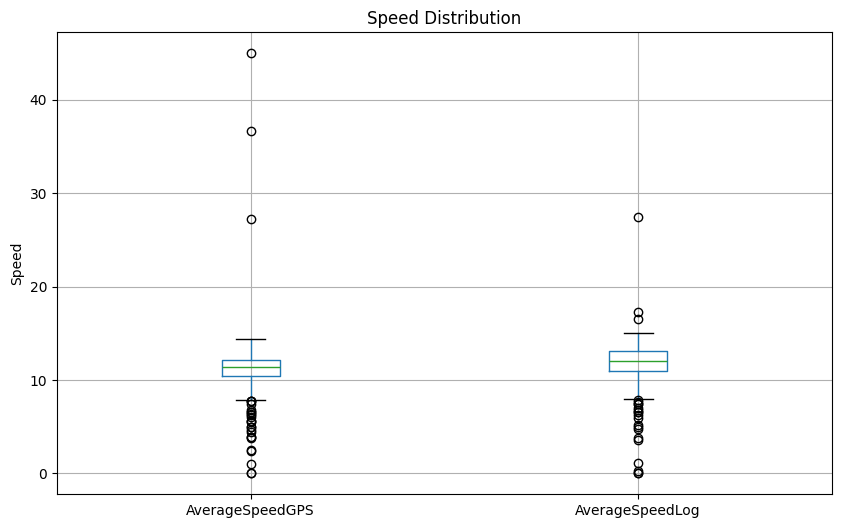

Summary statistics for key performance indicators:
       AverageSpeedGPS  Engine.PowerAtShaft  Engine.RPM  CargoMetricTons
count       376.000000           355.000000  355.000000       324.000000
mean         11.140745          5271.967099   79.608732     46428.793210
std           3.144551           770.557909    5.847140     42462.093681
min           0.000000           665.000000    7.500000         0.000000
25%          10.427500          5096.000000   78.950000         0.000000
50%          11.435000          5400.000000   80.800000     76173.000000
75%          12.170000          5636.555000   82.100000     88159.500000
max          45.000000          7970.000000   85.800000     90809.000000


In [112]:
# correlation matrix for some key performance indicators
kpi_cols = ['AverageSpeedGPS', 'Engine.PowerAtShaft', 'Engine.RPM', 'CargoMetricTons']
correlation_matrix = df[kpi_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Performance Indicators')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Engine.PowerAtShaft'], df['AverageSpeedGPS'], alpha=0.5)
plt.xlabel('Engine Power at Shaft')
plt.ylabel('Average Speed (GPS)')
plt.title('Engine Power vs Speed')
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column=['AverageSpeedGPS', 'AverageSpeedLog'])
plt.title('Speed Distribution')
plt.ylabel('Speed')
plt.show()

print("\
Summary statistics for key performance indicators:")
print(df[kpi_cols].describe())

In [ ]:
import ast

file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\exp_prfrm_here.csv'
try:
    df['Consumptions_Parsed'] = df['Consumptions'].apply(lambda x: sum(item['Amount'] for item in ast.literal_eval(x) if isinstance(item, dict)))
    print("Successfully parsed Consumption column.")
except Exception as e:
    print("Error parsing Consumption column:", e)

# Display the first few rows of the parsed column
print("\
Parsed Consumptions column:")
print(df[['Consumptions', 'Consumptions_Parsed']].head())
df.to_csv(file_path, index=False)

Successfully parsed Consumption column.
Parsed Consumptions column:
                                        Consumptions  Consumptions_Parsed
0  [{'Amount': 2.8, 'ConsumptionTypeIDCode': 'AUX...                 26.8
1  [{'Amount': 0.6, 'ConsumptionTypeIDCode': 'AUX...                  2.0
2  [{'Amount': 1.7, 'ConsumptionTypeIDCode': 'BOI...                  5.1
3  [{'Amount': 1.8, 'ConsumptionTypeIDCode': 'BOI...                  4.7
4  [{'Amount': 1.8, 'ConsumptionTypeIDCode': 'BOI...                  4.4


Analysing the data for filling the missing vales appropriately

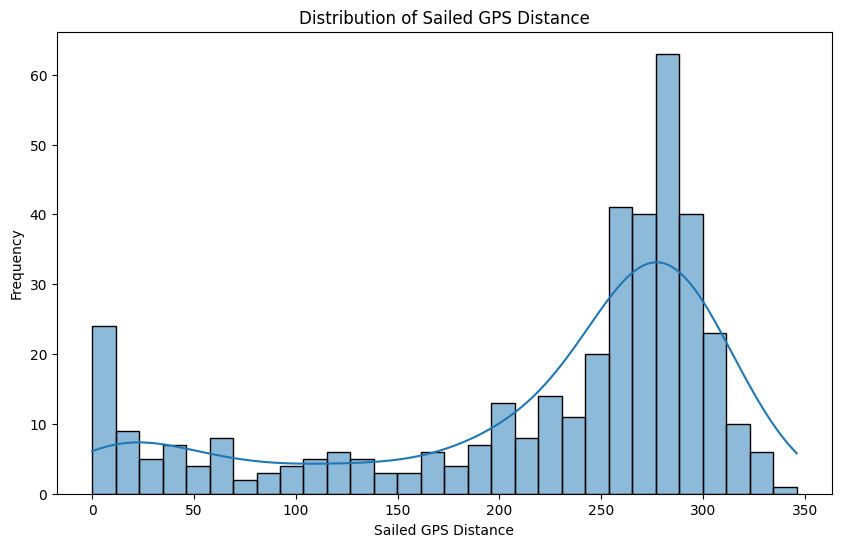

Mean of Sailed GPS Distance: 219.73164556962024
Median of Sailed GPS Distance: 261.0


In [ ]:
# distribution of 'SailedGPSDistance'
plt.figure(figsize=(10, 6))
sns.histplot(df['SailedDistanceGPS'].dropna(), bins=30, kde=True)
plt.title('Distribution of Sailed GPS Distance')
plt.xlabel('Sailed GPS Distance')
plt.ylabel('Frequency')
plt.show()

mean_value = df['SailedDistanceGPS'].mean()
median_value = df['SailedDistanceGPS'].median()
print(f"Mean of Sailed GPS Distance: {mean_value}")
print(f"Median of Sailed GPS Distance: {median_value}")

From the plot of 'SailedDistanceGPS'vs'Consumptions_Parsed' snd the correlation factor, we can observe a linear pattern in the data so this is the reason which we have used linearregression for filling the missing values.

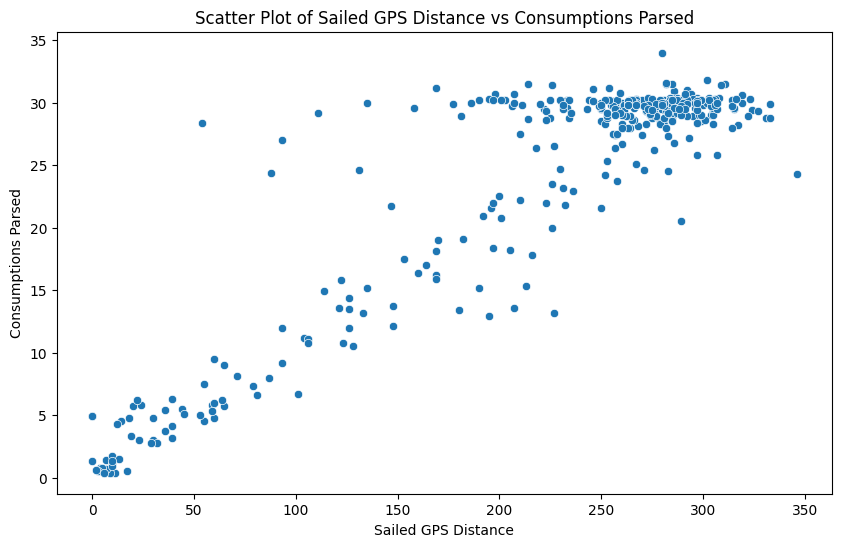

Correlation coefficient between Sailed GPS Distance and Consumptions Parsed: 0.9245933387689714


In [ ]:

# Plot the scatter plot of 'SailedGPSDistance' vs 'Consumptions_Parsed'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SailedDistanceGPS', y='Consumptions_Parsed')
plt.title('Scatter Plot of Sailed GPS Distance vs Consumptions Parsed')
plt.xlabel('Sailed GPS Distance')
plt.ylabel('Consumptions Parsed')
plt.show()

# Calculate and print the correlation coefficient
correlation = df[['SailedDistanceGPS', 'Consumptions_Parsed']].corr().iloc[0, 1]
print(f"Correlation coefficient between Sailed GPS Distance and Consumptions Parsed: {correlation}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\lin_reg_saileddis copy.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()  

df_non_missing = df.dropna(subset=['SailedDistanceGPS'])
df_missing = df[df['SailedDistanceGPS'].isnull()]

X = df_non_missing[['Consumptions_Parsed']]
y = df_non_missing['SailedDistanceGPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Predict missing values
X_missing = df_missing[['Consumptions_Parsed']]
predicted_values = model.predict(X_missing)

df.loc[df['SailedDistanceGPS'].isnull(), 'SailedDistanceGPS'] = predicted_values

print("Filled missing values in 'SailedDistanceGPS':")
print(df[['SailedDistanceGPS', 'Consumptions_Parsed']].head())

df.to_csv(file_path, index=False)

Mean Squared Error: 1775.1850895256753
R-squared: 0.7443759435704379
Filled missing values in 'SailedDistanceGPS':
   SailedDistanceGPS  Consumptions_Parsed
0         286.000000                 26.8
1          22.744888                  2.0
2          50.762714                  5.1
3          47.147511                  4.7
4          44.436108                  4.4


- **Calculation**: `Fuel_Consumption_per_NM` is calculated by dividing `Consumptions_Parsed` by `SailedDistanceGPS`.


Summary statistics for calculated variables:
       Fuel_Consumption_per_NM
count               682.000000
mean                  0.101371
std                   0.037502
min                   0.000000
25%                   0.091870
50%                   0.097709
75%                   0.107525
max                   0.525926


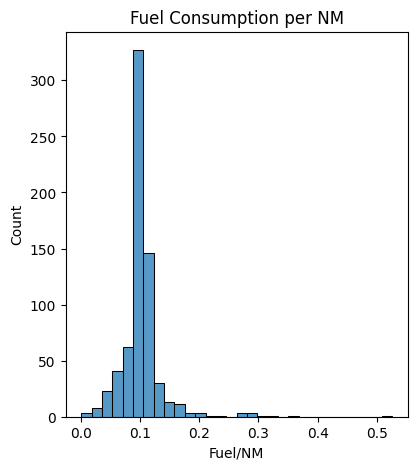

In [ ]:
file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\lin_reg_saileddis.csv'
df = pd.read_csv(file_path)


df['Fuel_Consumption_per_NM'] = df['Consumptions_Parsed'] / df['SailedDistanceGPS']


for col in ['Fuel_Consumption_per_NM']:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)

print("Summary statistics for calculated variables:")
summary_stats = df[['Fuel_Consumption_per_NM']].describe()
print(summary_stats)

plt.figure(figsize=(15, 5))

# Plot 1: Fuel Consumption per NM
plt.subplot(131)
sns.histplot(data=df, x='Fuel_Consumption_per_NM', bins=30)
plt.title('Fuel Consumption per NM')
plt.xlabel('Fuel/NM')

plt.show()



In [ ]:
import pandas as pd
import ast

file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\exp_prfrm_here.csv'
df = pd.read_csv(file_path)

try:
    df['FuelRobs_Parsed'] = df['FuelRobs'].apply(lambda x: sum(item['Amount'] for item in ast.literal_eval(x) if isinstance(item, dict)))
    print("Successfully parsed FuelRobs column.")
except Exception as e:
    print("Error parsing FuelRobs column:", e)

print("Parsed Consumptions and FuelRobs columns:")
print(df[['FuelRobs', 'FuelRobs_Parsed']].head())

df.to_csv(file_path, index=False)

Successfully parsed FuelRobs column.
Parsed Consumptions and FuelRobs columns:
                                            FuelRobs  FuelRobs_Parsed
0  [{'FuelOilTypeIDCode': 'MGO', 'Amount': 160.4}...           1481.3
1  [{'FuelOilTypeIDCode': 'MDOLS', 'Amount': 0.0}...           1479.3
2  [{'FuelOilTypeIDCode': 'MDO', 'Amount': 0.0}, ...           1474.2
3  [{'FuelOilTypeIDCode': 'HFO', 'Amount': 1309.3...           1469.5
4  [{'FuelOilTypeIDCode': 'MDO', 'Amount': 0.0}, ...           1465.1


In [129]:
df['BallastWater'] = df['BallastWater'].fillna(method='ffill')
df.to_csv(file_path, index=False)

C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\1964471515.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['BallastWater'] = df['BallastWater'].fillna(method='ffill')


In [ ]:
df['BoilerIsExhaustBypassActive'] = df['BoilerIsExhaustBypassActive'].fillna(method='ffill')
df['CargoMetricTons'] = df['CargoMetricTons'].fillna(method='ffill')
df['ChartererSpeedOrder'] = df['ChartererSpeedOrder'].fillna(method='ffill')
df['ChiefEngineerName'] = df['ChiefEngineerName'].fillna(method='ffill')


df.to_csv(file_path, index=False)

C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2103049073.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['BoilerIsExhaustBypassActive'] = df['BoilerIsExhaustBypassActive'].fillna(method='ffill')
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2103049073.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BoilerIsExhaustBypassActive'] = df['BoilerIsExhaustBypassActive'].fillna(method='ffill')
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2103049073.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CargoMetricTons'] = df['CargoMetricTons'].fillna(method='ffill')
C:\Users

In [141]:
consumptions_dtype = df['Consumptions'].dtype
print(f"The datatype of the 'consumptions' column is: {consumptions_dtype}")

The datatype of the 'consumptions' column is: object


  ### Fuel Properties Across Different FuelTypeIDCodes

- **Averaging**: The data is grouped by `FuelTypeIDCode` to calculate average values for the following fields:  
  - `LowerCalorificValue`
  - `Sulphur`
  - `Temperature`
  - `Viscosity`


#### General Observations:
- **HFO** shows the highest values for **Sulphur**, **Temperature**, and **Viscosity** 
- **MGO** and **MGOLS** are similar with lower values in all categories, except **LowerCalorificValue**, where they are slightly higher than **HFO**.

#### Key Findings:
1. **LowerCalorificValue**: No significant differences across fuel types, with values.
2. **Sulphur**: HFO has significantly higher sulphur, implying higher emissions and environmental impacts.
3. **Temperature**: HFO and VLSFO require specific heating measures due to high temperatures, while MGO and MGOLS are cooler.
4. **Viscosity**: HFO and VLSFO have high viscosity, requiring more handling equipment compared to MGO and MGOLS.

#### Conclusions:
- **HFO** stands out due to its higher sulphur, temperature, and viscosity, making it more challenging to handle and environmentally impactful.
- **MGO** and **MGOLS** are similar with low values, presenting cost-effective and compliant options.
- **VLSFO** offers a balance of properties.

#### Recommendations:
- We have to select fuels based on operational needs, with HFO requiring special measures for handling and compliance.
- Considering trade-offs between **cost**, **efficiency**, and **environmental impacts** when choosing fuel.


Averages grouped by FuelTypeIDCode:
  FuelTypeIDCode  LowerCalorificValue   Sulphur  Temperature  Viscosity
0            HFO            40.669386  1.816107   117.762238  14.085392
1            MGO            42.640000  0.086000    39.000000   3.800000
2          MGOLS            42.504467  0.152579    35.042640   3.397462
3          VLSFO            41.923158  0.360000   117.105263  11.684211


C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2365669784.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=averages, x='FuelTypeIDCode', y=field, palette='viridis')


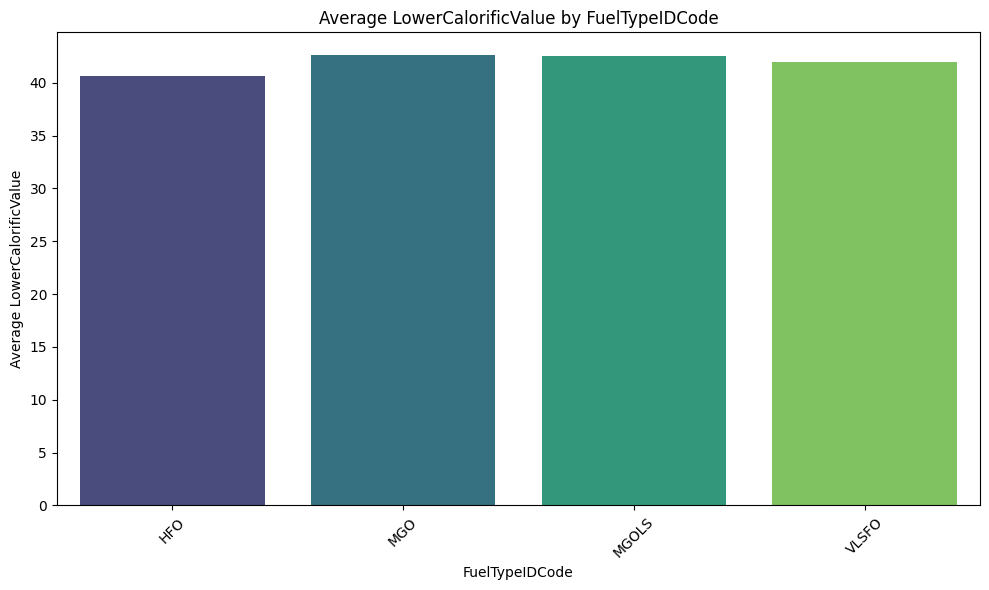

C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2365669784.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=averages, x='FuelTypeIDCode', y=field, palette='viridis')


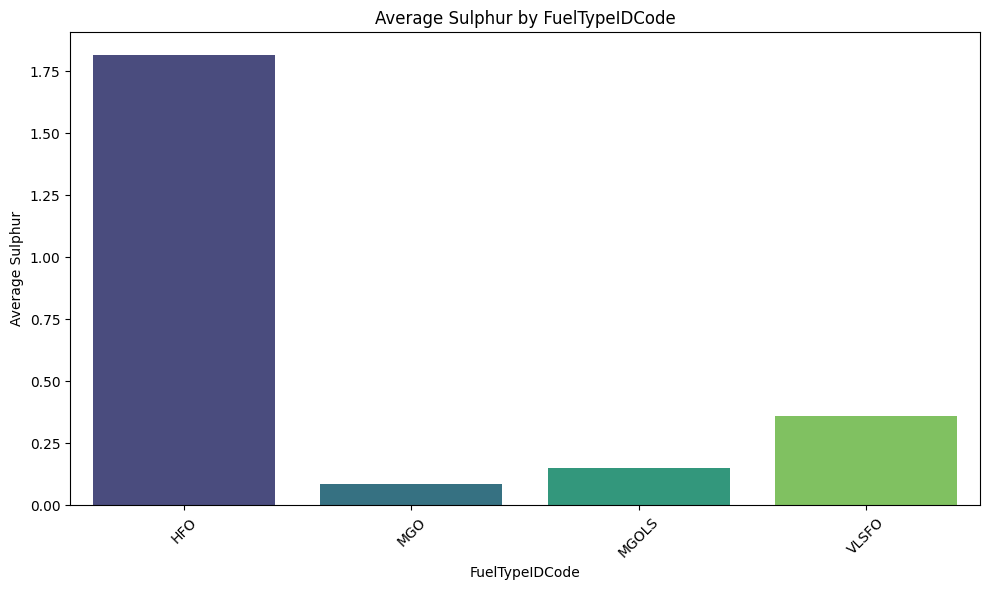

C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2365669784.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=averages, x='FuelTypeIDCode', y=field, palette='viridis')


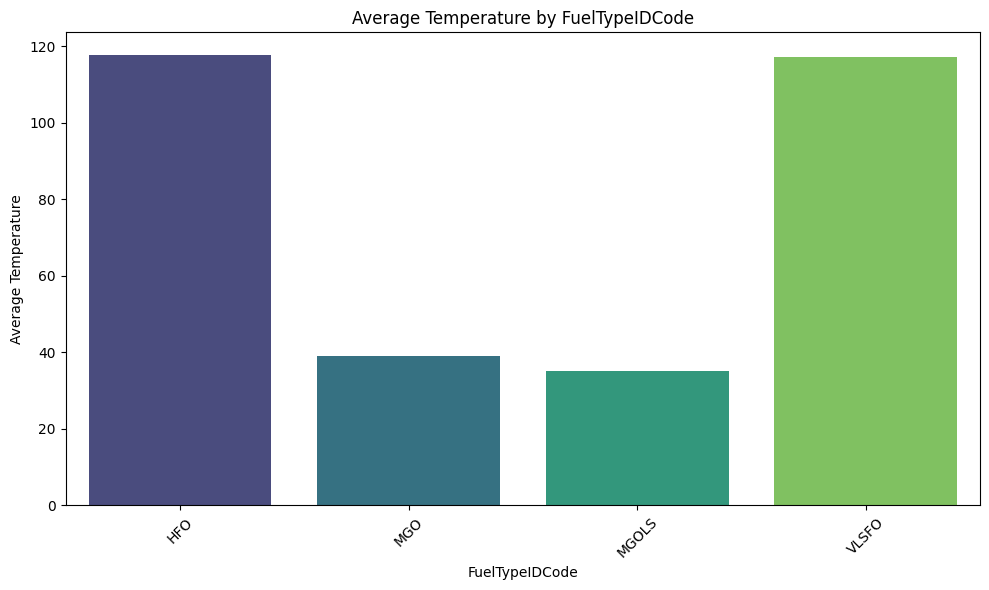

C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2365669784.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=averages, x='FuelTypeIDCode', y=field, palette='viridis')


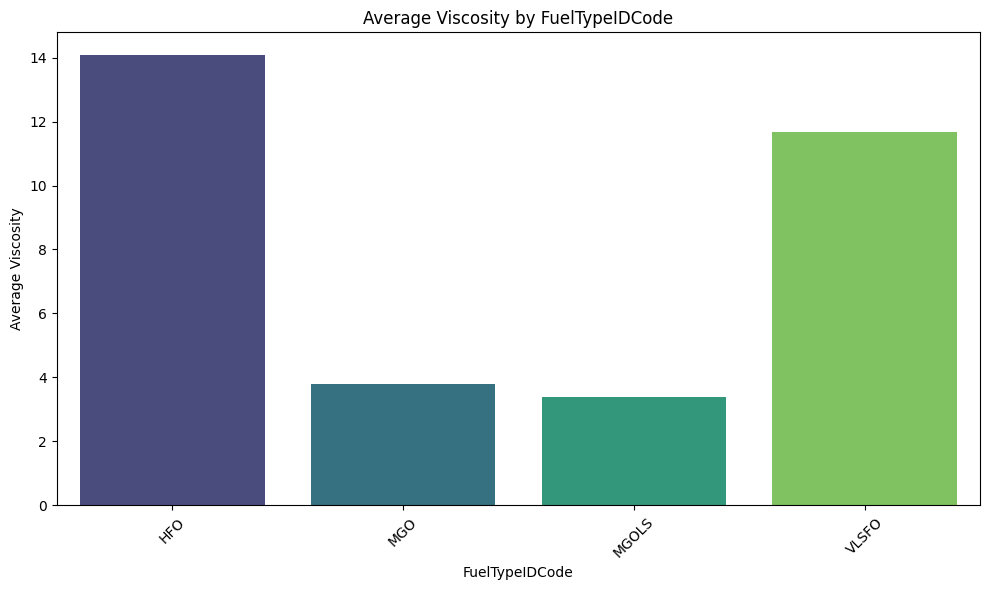

In [ ]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns

def parse_consumptions(consumptions_data):
    try:
        data = ast.literal_eval(consumptions_data)
        return [entry for entry in data if entry['Amount'] != 0]
    except:
        return []

df['Parsed_Consumptions'] = df['Consumptions'].apply(parse_consumptions)

consumptions_df = df.explode('Parsed_Consumptions')

consumptions_df = pd.concat([
    consumptions_df.drop(columns=['Parsed_Consumptions']),
    consumptions_df['Parsed_Consumptions'].apply(pd.Series)
], axis=1)

consumptions_df = consumptions_df[consumptions_df['Amount'] != 0]

averages = consumptions_df.groupby('FuelTypeIDCode')[
    ['LowerCalorificValue', 'Sulphur', 'Temperature', 'Viscosity']
].mean().reset_index()

print("Averages grouped by FuelTypeIDCode:")
print(averages)

fields = ['LowerCalorificValue', 'Sulphur', 'Temperature', 'Viscosity']
for field in fields:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=averages, x='FuelTypeIDCode', y=field, palette='viridis')
    plt.title('Average ' + field + ' by FuelTypeIDCode')
    plt.xlabel('FuelTypeIDCode')
    plt.ylabel('Average ' + field)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Fuel Consumption Distribution Across Engines

#### Key Insights:
- **HFO (Heavy Fuel Oil)** dominates fuel consumption across all types (AUXENGINE, BOILER, MAINENGINE), with **AUXENGINE** usage being the highest.

#### Conclusions:
- **HFO** is the most used fuel by a significant margin.
- **AUXENGINE** is the primary consumption type across most fuels.
- **MGO** consumption is almost negligible, while **MGOLS** and **VLSFO** are used much less than HFO.

#### Implications:
- This data helps in understanding fuel usage trends for shipping and marine industries, potentially influencing cost and fuel efficiency decisions.


Count of ConsumptionTypeIDCode for each FuelTypeIDCode:
ConsumptionTypeIDCode  AUXENGINE  BOILER  MAINENGINE
FuelTypeIDCode                                      
HFO                          602     251         434
MGO                            1       1           0
MGOLS                         93      58          46
VLSFO                          9       1           9


<Figure size 1200x600 with 0 Axes>

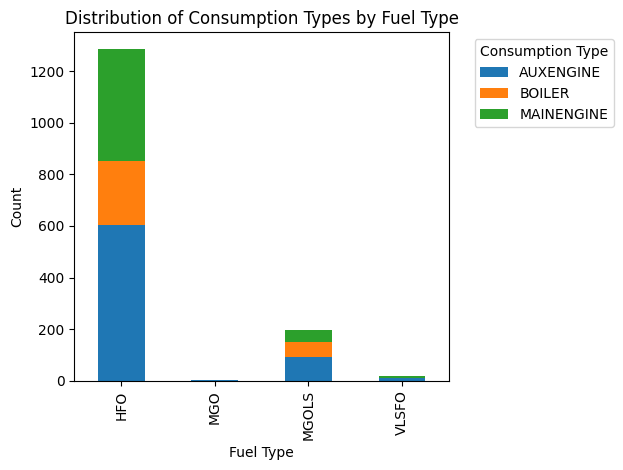

In [154]:
import ast
import matplotlib.pyplot as plt

def parse_consumptions(consumptions_data):
    try:
        data = ast.literal_eval(consumptions_data)
        return [entry for entry in data if entry.get('Amount', 0) != 0]
    except:
        return []

df['Parsed_Consumptions'] = df['Consumptions'].apply(parse_consumptions)

consumptions_df = df.explode('Parsed_Consumptions')

consumptions_df = pd.concat([
    consumptions_df.drop(columns=['Parsed_Consumptions']),
    consumptions_df['Parsed_Consumptions'].apply(pd.Series)
], axis=1)

consumption_counts = pd.crosstab(
    consumptions_df['FuelTypeIDCode'],
    consumptions_df['ConsumptionTypeIDCode']
)

print("Count of ConsumptionTypeIDCode for each FuelTypeIDCode:")
print(consumption_counts)

plt.figure(figsize=(12, 6))
consumption_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Consumption Types by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.legend(title='Consumption Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

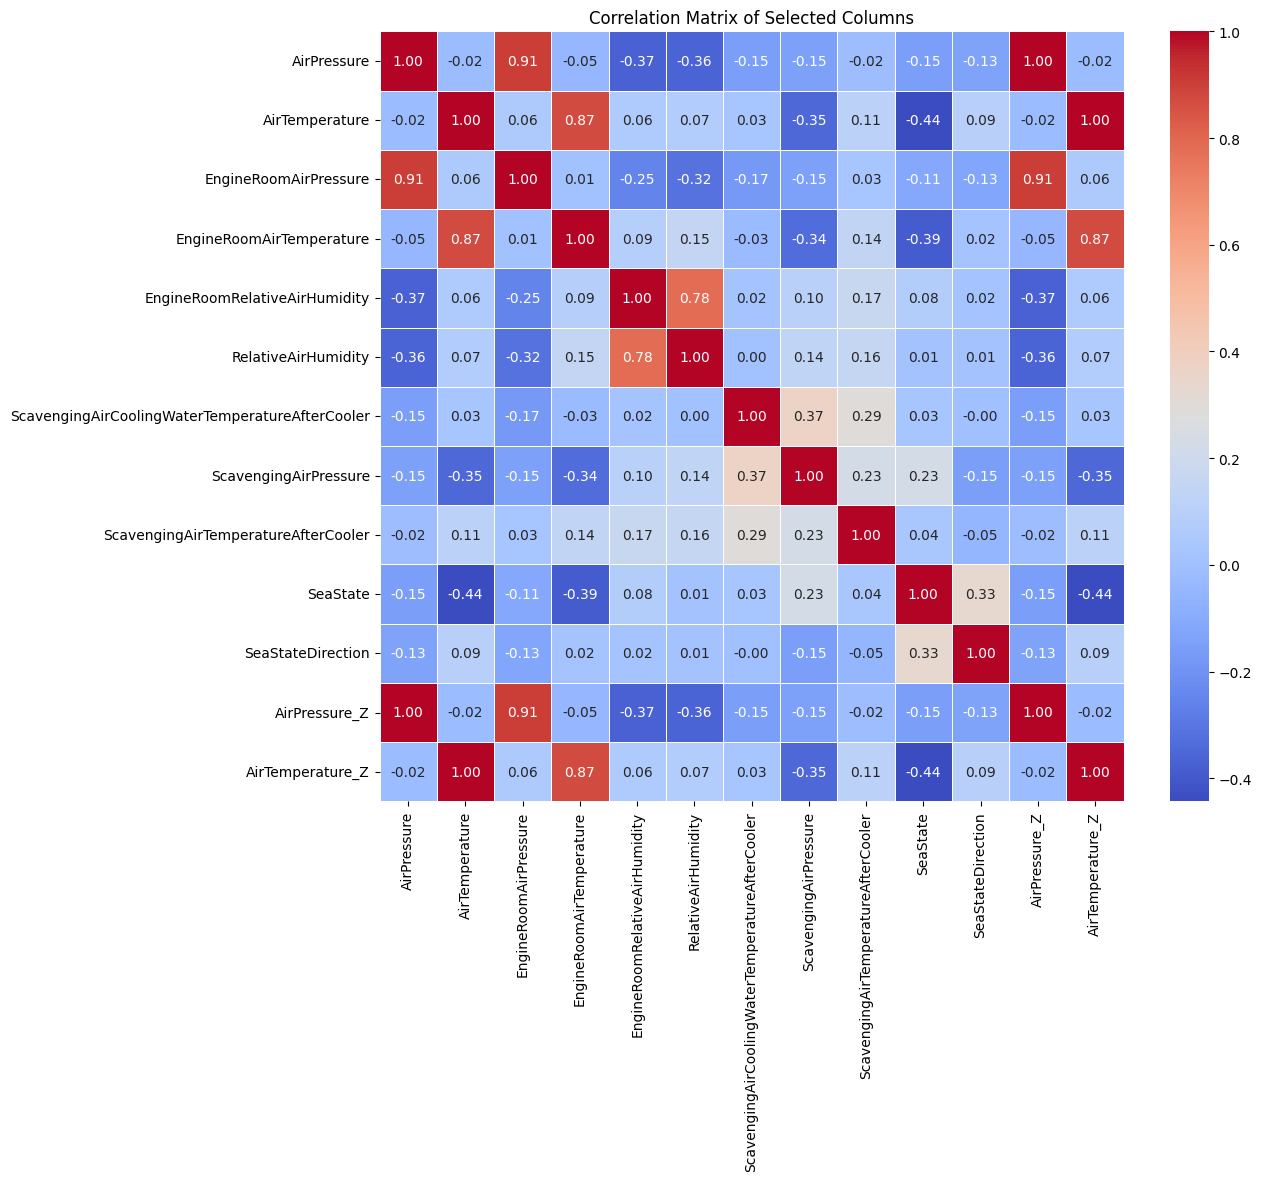

In [ ]:
# Select the columns of interest

file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\exp_prfrm_here.csv'
df = pd.read_csv(file_path)

selected_columns = [
    'AirPressure', 'AirTemperature', 'EngineRoomAirPressure', 'EngineRoomAirTemperature',
    'EngineRoomRelativeAirHumidity', 'RelativeAirHumidity', 'ScavengingAirCoolingWaterTemperatureAfterCooler',
    'ScavengingAirPressure', 'ScavengingAirTemperatureAfterCooler', 'SeaState', 'SeaStateDirection',
    'AirPressure_Z', 'AirTemperature_Z'
]
df.head()

df_selected = df[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Columns')
plt.show()

### PCA Transformation of Air Pressure and Air Temperature Data

We applied Principal Component Analysis (PCA) to simplify and reduce the dimensionality of air pressure and air temperature data. This was done because we observed strong correlations within the features, and PCA helps in combining these features into a single component, making analysis easier.

1. **Feature Sets**: 
   - `pca_set1`: Air pressure features (`AirPressure`, `EngineRoomAirPressure`, `AirPressure_Z`).
   - `pca_set2`: Air temperature features (`AirTemperature`, `AirTemperature_Z`, `EngineRoomAirTemperature`).

2. **Standardization**: Both sets were standardized to ensure equal scaling.

3. **PCA**: We extracted the first principal component for both sets, creating `PCA_AirPressure` and `PCA_AirTemperature`.



In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\exp_prfrm_here.csv'
df = pd.read_csv(file_path)

pca_set1 = ["AirPressure", "EngineRoomAirPressure", "AirPressure_Z"]
pca_set2 = ["AirTemperature", "AirTemperature_Z", "EngineRoomAirTemperature"]

# Standardize the data (important for PCA)
scaler = StandardScaler()
df[pca_set1] = scaler.fit_transform(df[pca_set1])
df[pca_set2] = scaler.fit_transform(df[pca_set2])

pca1 = PCA(n_components=1)  
mask_set1 = df[pca_set1].notnull().all(axis=1)  
df.loc[mask_set1, "PCA_AirPressure"] = pca1.fit_transform(df.loc[mask_set1, pca_set1])

pca2 = PCA(n_components=1) 
mask_set2 = df[pca_set2].notnull().all(axis=1) 
df.loc[mask_set2, "PCA_AirTemperature"] = pca2.fit_transform(df.loc[mask_set2, pca_set2])

df.loc[~mask_set1, "PCA_AirPressure"] = None
df.loc[~mask_set2, "PCA_AirTemperature"] = None

output_file = "pca_transformed_data.csv"
df.to_csv(output_file, index=False)

print(f"Data with PCA columns saved to: {output_file}")


Data with PCA columns saved to: pca_transformed_data.csv


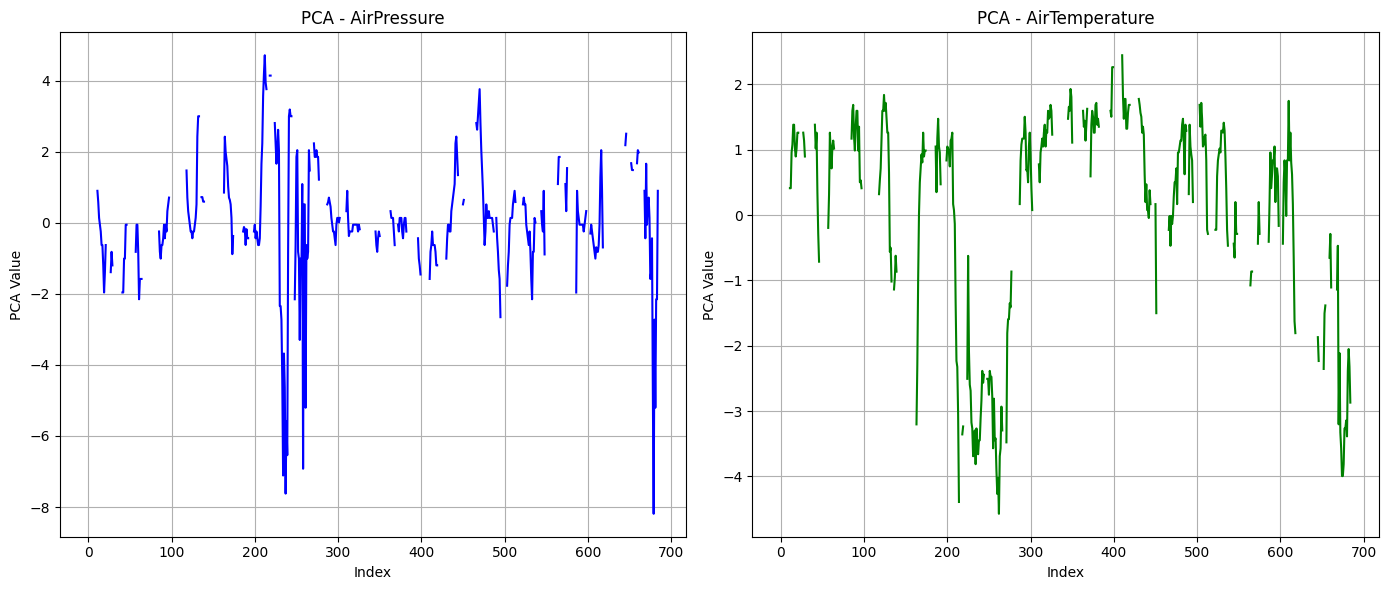

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the modified CSV file with PCA results
file_path = "C:\\Users\\tarun\Downloads\\Assignment_vessels\\pca_transformed_data.csv"  # Path to the new CSV file
df = pd.read_csv(file_path)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df.index, df["PCA_AirPressure"], label="PCA_AirPressure", color="blue")
plt.title("PCA - AirPressure")
plt.xlabel("Index")
plt.ylabel("PCA Value")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df.index, df["PCA_AirTemperature"], label="PCA_AirTemperature", color="green")
plt.title("PCA - AirTemperature")
plt.xlabel("Index")
plt.ylabel("PCA Value")
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


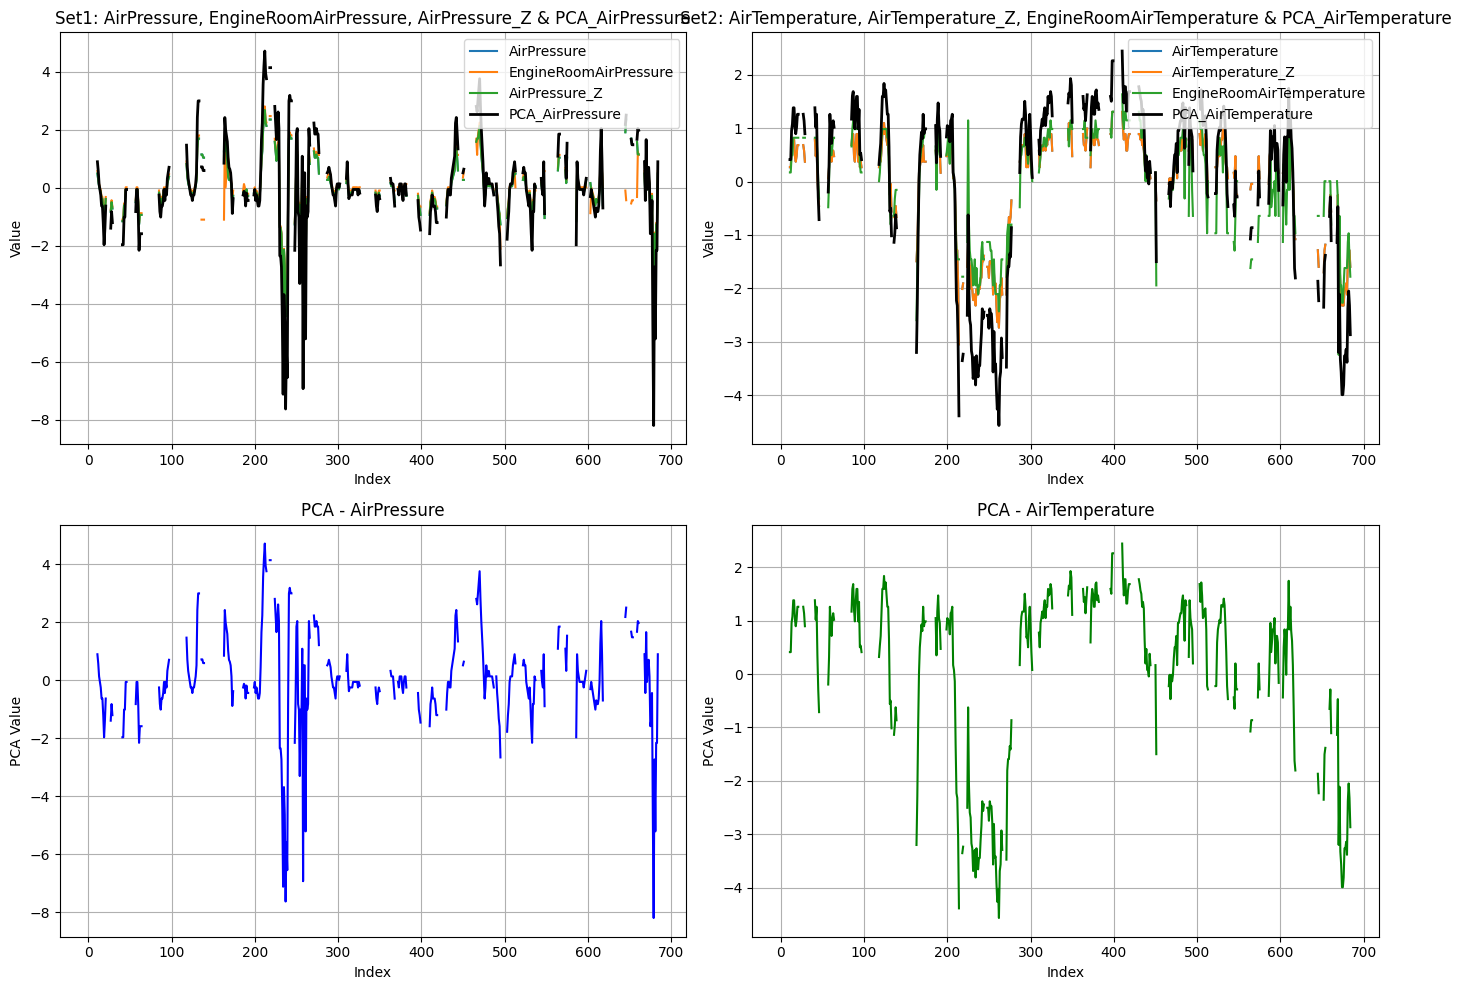

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "pca_transformed_data.csv"  
df = pd.read_csv(file_path)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
for col in pca_set1:
    plt.plot(df.index, df[col], label=col)
plt.plot(df.index, df["PCA_AirPressure"], label="PCA_AirPressure", color="black", linewidth=2)
plt.title("Set1: AirPressure, EngineRoomAirPressure, AirPressure_Z & PCA_AirPressure")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.grid(True)

plt.subplot(2, 2, 2)
for col in pca_set2:
    plt.plot(df.index, df[col], label=col)
plt.plot(df.index, df["PCA_AirTemperature"], label="PCA_AirTemperature", color="black", linewidth=2)
plt.title("Set2: AirTemperature, AirTemperature_Z, EngineRoomAirTemperature & PCA_AirTemperature")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df.index, df["PCA_AirPressure"], label="PCA_AirPressure", color="blue")
plt.title("PCA - AirPressure")
plt.xlabel("Index")
plt.ylabel("PCA Value")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df.index, df["PCA_AirTemperature"], label="PCA_AirTemperature", color="green")
plt.title("PCA - AirTemperature")
plt.xlabel("Index")
plt.ylabel("PCA Value")
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


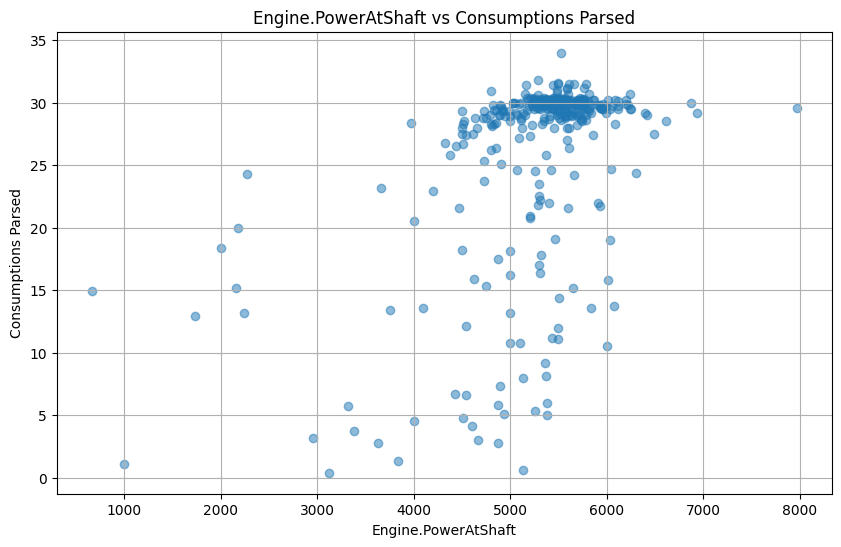

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\exp_prfrm_here.csv'
df = pd.read_csv(file_path)

if 'Engine.PowerAtShaft' in df.columns and 'Consumptions_Parsed' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Engine.PowerAtShaft'], df['Consumptions_Parsed'], alpha=0.5)
    plt.title('Engine.PowerAtShaft vs Consumptions Parsed')
    plt.xlabel('Engine.PowerAtShaft')
    plt.ylabel('Consumptions Parsed')
    plt.grid(True)
    plt.show()
else:
    print("The columns 'Engine.RunningHours' and/or 'Consumptions_Parsed' do not exist in the DataFrame.")

### Model Evaluation for Predicting Engine Power

We attempted to model the relationship between `Engine.PowerAtShaft` (target) and `Consumptions_Parsed` (predictor). 

1. **Initial Approach**:  
   - A scatter plot between the two columns indicated that KNN (K-Nearest Neighbors) could be a good fit due to apparent local trends.

2. **Model Performance**:  
   - The initial model resulted in poor RSME and R² scores, indicating suboptimal performance.
   - Tuning the model with `n=10` (neighbors) did not improve the results.

3. **Conclusion**:  
   - Despite efforts, the model failed to capture meaningful patterns from the data. As a result, we decided not to proceed with using this dataset for further predictions.

This iterative approach highlights the importance of evaluating model performance before finalizing decisions.


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

file_path = r"C:\Users\tarun\Downloads\Assignment_vessels\Engine_power_runn.csv"
data = pd.read_csv(file_path)

target_column = "Engine.PowerAtShaft"
predictor_column = "Consumptions_Parsed"

df = data.copy()

train = df[df[target_column].notnull()]  
test = df[df[target_column].isnull()]    

X_train = train[[predictor_column]]  
y_train = train[target_column]      

# Applying KNN imputation to the entire dataset (including both predictor and target)
imputer = KNNImputer(n_neighbors=4)
df_imputed = imputer.fit_transform(df[[predictor_column, target_column]])

df_imputed = pd.DataFrame(df_imputed, columns=[predictor_column, target_column])

# Add a new column in the original dataset to store the imputed values
data['Engine.PowerAtShaft_Imputed'] = df_imputed[target_column]

data.loc[data[target_column].isnull(), target_column] = df_imputed[target_column][data[target_column].isnull()]

data.to_csv(file_path, index=False)

y_true = y_train  
y_pred_imputed = df_imputed[target_column].iloc[:len(train)]  

# Calculate RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(y_true, y_pred_imputed))

# Calculate R-squared
r2 = r2_score(y_true, y_pred_imputed)

# Print the results
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 1356.3647542888266
R²: -2.1071879037717043


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from math import sqrt

file_path = r"C:\Users\tarun\Downloads\Assignment_vessels\Engine_power_runn.csv"
data = pd.read_csv(file_path)

target_column = "Engine.PowerAtShaft"
predictor_column = "Consumptions_Parsed"

df = data.copy()

train = df[df[target_column].notnull()]  
test = df[df[target_column].isnull()]    

# Extract features (X) and target (y) for training
X_train = train[[predictor_column]]  
y_train = train[target_column]     

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply KNN imputation to the entire dataset (including both predictor and target)
imputer = KNNImputer(n_neighbors=10)  # Adjust n_neighbors as needed
df_imputed = imputer.fit_transform(df[[predictor_column, target_column]])
df_imputed = pd.DataFrame(df_imputed, columns=[predictor_column, target_column])

data['Engine.PowerAtShaft_Imputed'] = df_imputed[target_column]

# data.loc[data[target_column].isnull(), target_column] = df_imputed[target_column][data[target_column].isnull()]

# data.to_csv(file_path, index=False)

y_true = y_train  
y_pred_imputed = df_imputed[target_column].iloc[:len(train)]  

rmse = sqrt(mean_squared_error(y_true, y_pred_imputed))
r2 = r2_score(y_true, y_pred_imputed)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


In [ ]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# from math import sqrt
# from sklearn.model_selection import GridSearchCV

# # Load the dataset
# file_path = r"C:\Users\tarun\Downloads\Assignment_vessels\Engine_power_runn.csv"
# data = pd.read_csv(file_path)

# # Separate the target column (Engine.PowerAtShaft) and predictor (Consumptions_Parsed)
# target_column = "Engine.PowerAtShaft"
# predictor_column = "Consumptions_Parsed"

# # Create a copy of the dataset to prevent altering the original data
# df = data.copy()

# # Split the data into rows where Engine.PowerAtShaft is not null (train) and is null (test)
# train = df[df[target_column].notnull()]  # Train set (non-null target)
# test = df[df[target_column].isnull()]    # Test set (null target)

# # Extract features (X) and target (y) for training
# X_train = train[[predictor_column]]  # Consumptions_Parsed as the feature
# y_train = train[target_column]      # Engine.PowerAtShaft as the target

# # Standardize the data (important for KNN)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# # Set up the parameter grid for tuning KNN hyperparameters
# param_grid = {
#     'n_neighbors': [3, 5, 7, 10],  # Try different values for n_neighbors
#     'weights': ['uniform', 'distance']  # Test both uniform and distance-based weighting
# }

# # Initialize the KNNImputer and GridSearchCV
# knn_imputer = KNNImputer()
# grid_search = GridSearchCV(knn_imputer, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Perform grid search on the train data
# grid_search.fit(X_train_scaled)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print(f"Best Hyperparameters: {best_params}")

# # Apply the best parameters to the KNN imputer
# best_knn_imputer = KNNImputer(
#     n_neighbors=best_params['n_neighbors'],
#     weights=best_params['weights']
# )

# # Apply KNN imputation with the best parameters to the entire dataset
# df_imputed = best_knn_imputer.fit_transform(df[[predictor_column, target_column]])

# # Convert the imputed array back into a DataFrame
# df_imputed = pd.DataFrame(df_imputed, columns=[predictor_column, target_column])

# # Add a new column in the original dataset to store the imputed values
# data['Engine.PowerAtShaft_Imputed'] = df_imputed[target_column]

# # Impute missing values in the original dataset (Engine.PowerAtShaft) using KNN
# data.loc[data[target_column].isnull(), target_column] = df_imputed[target_column][data[target_column].isnull()]

# # Save the updated dataset with imputed values in a new column
# data.to_csv(file_path, index=False)

# # For evaluation: Use only the rows that originally had non-null values in Engine.PowerAtShaft (training set)
# y_true = y_train  # Actual values for Engine.PowerAtShaft in the train set
# y_pred_imputed = df_imputed[target_column].iloc[:len(train)]  # Imputed values corresponding to the train set

# # Calculate RMSE (Root Mean Squared Error)
# rmse = sqrt(mean_squared_error(y_true, y_pred_imputed))

# # Calculate R-squared
# r2 = r2_score(y_true, y_pred_imputed)

# # Print the results
# print(f"RMSE: {rmse}")
# print(f"R²: {r2}")


In [194]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\tarun\Downloads\Assignment_vessels\Engine_power_runn.csv"
data = pd.read_csv(file_path)

print(f"Missing values in Engine.PowerAtShaft_NN: {data['Engine.PowerAtShaft_NN'].isnull().sum()}")
cleaned_data = data.dropna(subset=['Engine.PowerAtShaft_NN'])
cleaned_data['Feature_Consumptions_Parsed_NN'] = cleaned_data['Consumptions_Parsed_NN']
cleaned_data['Target_Engine_PowerAtShaft_NN'] = cleaned_data['Engine.PowerAtShaft_NN']
cleaned_data = cleaned_data[['Feature_Consumptions_Parsed_NN', 'Target_Engine_PowerAtShaft_NN']]

new_file_path = r"C:\Users\tarun\Downloads\Engine_power_runn_cleaned.csv"
cleaned_data.to_csv(new_file_path, index=False)

print(f"Cleaned data saved to {new_file_path}")


Missing values in Engine.PowerAtShaft_NN: 330
Cleaned data saved to C:\Users\tarun\Downloads\Engine_power_runn_cleaned.csv


C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3360337257.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Feature_Consumptions_Parsed_NN'] = cleaned_data['Consumptions_Parsed_NN']
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\3360337257.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Target_Engine_PowerAtShaft_NN'] = cleaned_data['Engine.PowerAtShaft_NN']


In [ ]:
!pip install --upgrade pip

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\tarun\\AppData\\Local\\Temp\\pip-uninstall-x3d96tey\\pip.exe'
Consider using the `--user` option or check the permissions.



  Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


### Neural Network Model for Engine Power Prediction

We used a neural network to predict `Target_Engine_PowerAtShaft_NN` from `Feature_Consumptions_Parsed_NN`:

- **Preprocessing**: Normalized the feature and split the data (80% train, 20% test).
- **Model**:
  - Input: 1 feature.
  - Two hidden layers (64 and 32 neurons, ReLU activation).
  - Output: 1 target with linear activation.
- **Training**: Optimized with Adam (LR=0.001), using MSE loss and MAE metric, for 100 epochs.

Despite tuning, the model gave poor RMSE and R² scores, indicating it failed to capture the relationship. We moved on to explore other approaches.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the cleaned dataset
file_path = r"C:\Users\tarun\Downloads\Assignment_vessels\Engine_power_runn_cleaned.csv"
data = pd.read_csv(file_path)

X = data[['Feature_Consumptions_Parsed_NN']].values  
y = data['Target_Engine_PowerAtShaft_NN'].values  

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets (using 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# neural network model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

r2 = r2_score(y_test, y_pred)

model.save(r"C:\Users\tarun\Downloads\engine_power_model.h5")
print(f"Model Training Complete.\nRMSE: {rmse:.4f}\nR²: {r2:.4f}")


Epoch 1/100


c:\Users\tarun\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 27647816.0000 - mae: 5167.4653 - val_loss: 28399794.0000 - val_mae: 5309.2510
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28123096.0000 - mae: 5227.8296 - val_loss: 28395412.0000 - val_mae: 5308.8340
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28466942.0000 - mae: 5270.8447 - val_loss: 28388452.0000 - val_mae: 5308.1729
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28986070.0000 - mae: 5341.4678 - val_loss: 28377116.0000 - val_mae: 5307.0977
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28886244.0000 - mae: 5313.3774 - val_loss: 28359826.0000 - val_mae: 5305.4600
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27425622.0000 - mae: 5148.0513 - val_loss: 28334528.0000 - val_mae: 5303.0635
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27991144.0000 - mae: 5196.7026 - val_loss: 28298820.0000 - val_mae: 5299.6885
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step -

Model Training Complete.
RMSE: 662.4503
R²: -1.0739


### Fuel Consumption Analysis: The Big Picture

- **Key Insight**: Longer engine runtime = higher fuel consumption.
- **Predictable Pattern**: Fuel usage is directly tied to runtime, making it reliable to forecast.

#### Implications:
- **Planning**: Helps estimate fuel needs based on engine runtime.
- **Maintenance**: Deviations from expected fuel consumption can signal potential issues.

This concludes that LinearRegression is a good model to proceed with and then we did linearRegression for which the accuracy scores were good thus we filled the missing values of enginerunninghours with the model prediction.


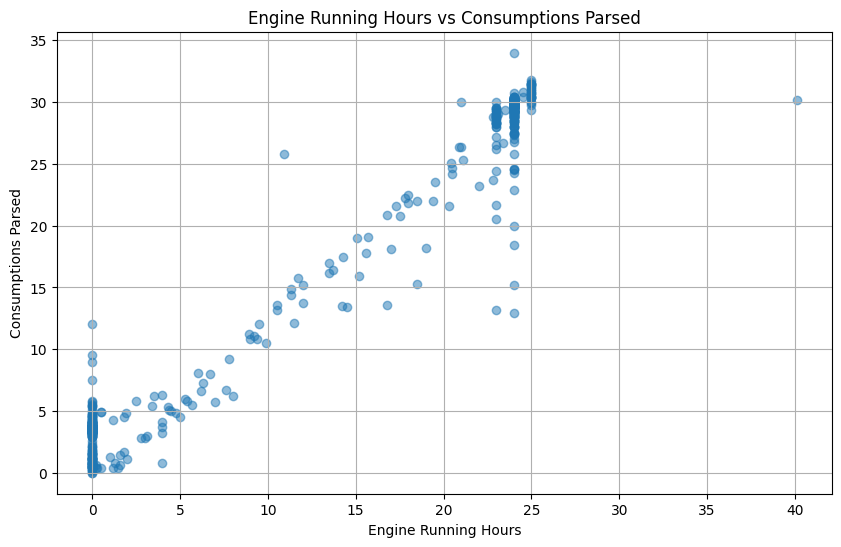

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\tarun\\Downloads\\Assignment_vessels\\exp_prfrm_here.csv'
df = pd.read_csv(file_path)

if 'Engine.RunningHours' in df.columns and 'Consumptions_Parsed' in df.columns:
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Engine.RunningHours'], df['Consumptions_Parsed'], alpha=0.5)
    plt.title('Engine Running Hours vs Consumptions Parsed')
    plt.xlabel('Engine Running Hours')
    plt.ylabel('Consumptions Parsed')
    plt.grid(True)
    plt.show()
else:
    print("The columns 'Engine.RunningHours' and/or 'Consumptions_Parsed' do not exist in the DataFrame.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

file_path = r"C:\Users\tarun\Downloads\Assignment_vessels\Engine_power_runn.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespace from column names

df['Engine.RunningHours'] = df['Engine.RunningHours'].replace(0, np.nan)  # Replace 0 with NaN for missing values
df['EngineRunningMinutes'] = df['Engine.RunningHours'] * 60  # Convert hours to minutes

df_non_missing = df.dropna(subset=['EngineRunningMinutes'])
df_missing = df[df['EngineRunningMinutes'].isnull()]

X = df_non_missing[['Consumptions_Parsed']]  
y = df_non_missing['EngineRunningMinutes']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

X_missing = df_missing[['Consumptions_Parsed']]
predicted_values = model.predict(X_missing)

df.loc[df['EngineRunningMinutes'].isnull(), 'EngineRunningMinutes'] = predicted_values

print("Filled missing values in 'EngineRunningMinutes':")
print(df[['EngineRunningMinutes', 'Consumptions_Parsed']].head())

df.to_csv(file_path, index=False)


Mean Squared Error: 5128.097868634194
R-squared: 0.9752351248679509
Filled missing values in 'EngineRunningMinutes':
   EngineRunningMinutes  Consumptions_Parsed
0           1440.000000                 26.8
1            188.416964                  2.0
2            330.426753                  5.1
3            312.102909                  4.7
4            298.360026                  4.4


In [ ]:
df['EngineRunningHours'] = (df['EngineRunningMinutes'] / 60).round(2)
df.to_csv(file_path, index=False)


Final Linear Regression plot

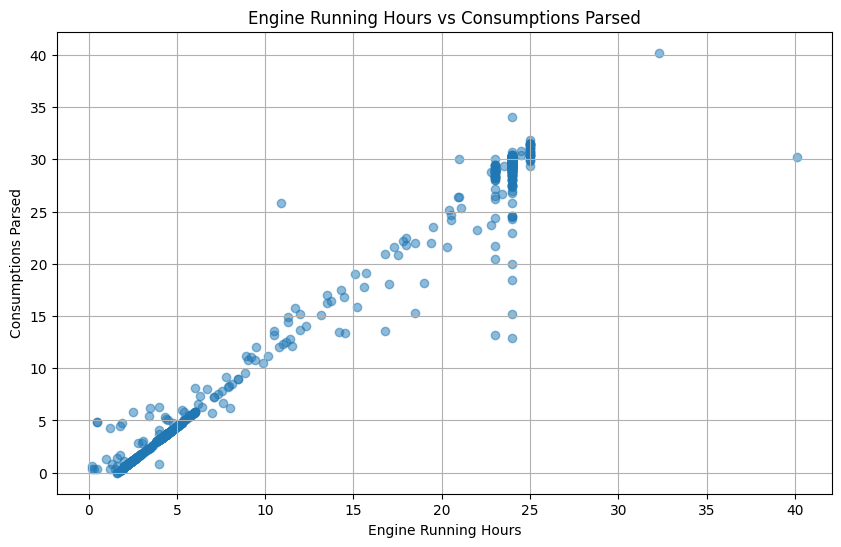

In [216]:
import pandas as pd
import matplotlib.pyplot as plt


if 'Engine.RunningHours' in df.columns and 'Consumptions_Parsed' in df.columns:
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Engine.RunningHours'], df['Consumptions_Parsed'], alpha=0.5)
    plt.title('Engine Running Hours vs Consumptions Parsed')
    plt.xlabel('Engine Running Hours')
    plt.ylabel('Consumptions Parsed')
    plt.grid(True)
    plt.show()
else:
    print("The columns 'Engine.RunningHours' and/or 'Consumptions_Parsed' do not exist in the DataFrame.")

### Correlation Matrix Analysis

Visualized relationships between key variables (`Engine.PowerAtShaft`, `Engine.RPM`, etc.) using a heatmap. Strong correlations highlight linear dependencies, aiding in feature selection for further modeling.


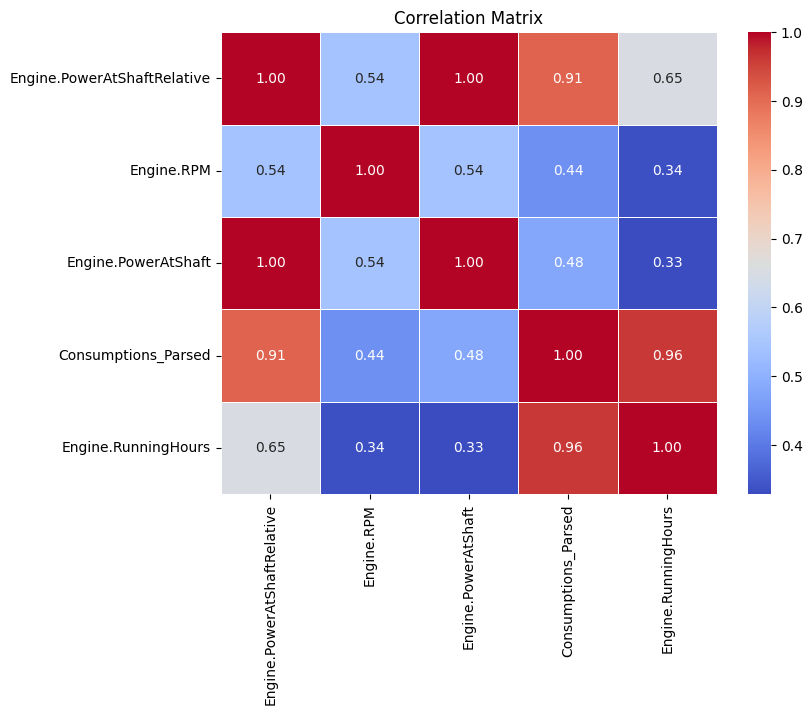

In [ ]:

df.columns = df.columns.str.strip()  

# columns for correlation
cols = ['Engine.PowerAtShaftRelative', 'Engine.RPM', 'Engine.PowerAtShaft', 'Consumptions_Parsed', 'Engine.RunningHours']

correlation_matrix = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

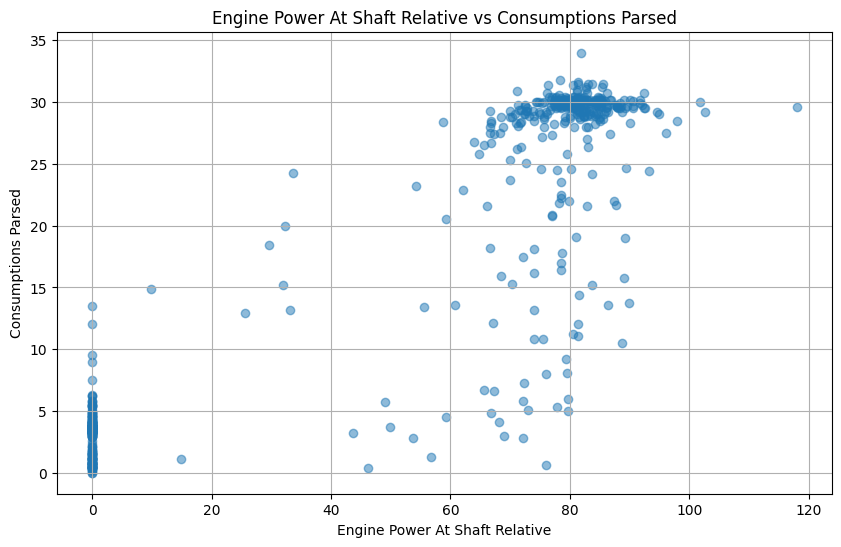

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
file_path = r"C:\Users\tarun\Downloads\Assignment_vessels\Engine_power_runn.csv"
df = pd.read_csv(file_path)
df.head()
plt.figure(figsize=(10, 6))
plt.scatter(df['Engine.PowerAtShaftRelative'], df['Consumptions_Parsed'], alpha=0.5)
plt.title('Engine Power At Shaft Relative vs Consumptions Parsed')
plt.xlabel('Engine Power At Shaft Relative')
plt.ylabel('Consumptions Parsed')
plt.grid(True)
plt.show()


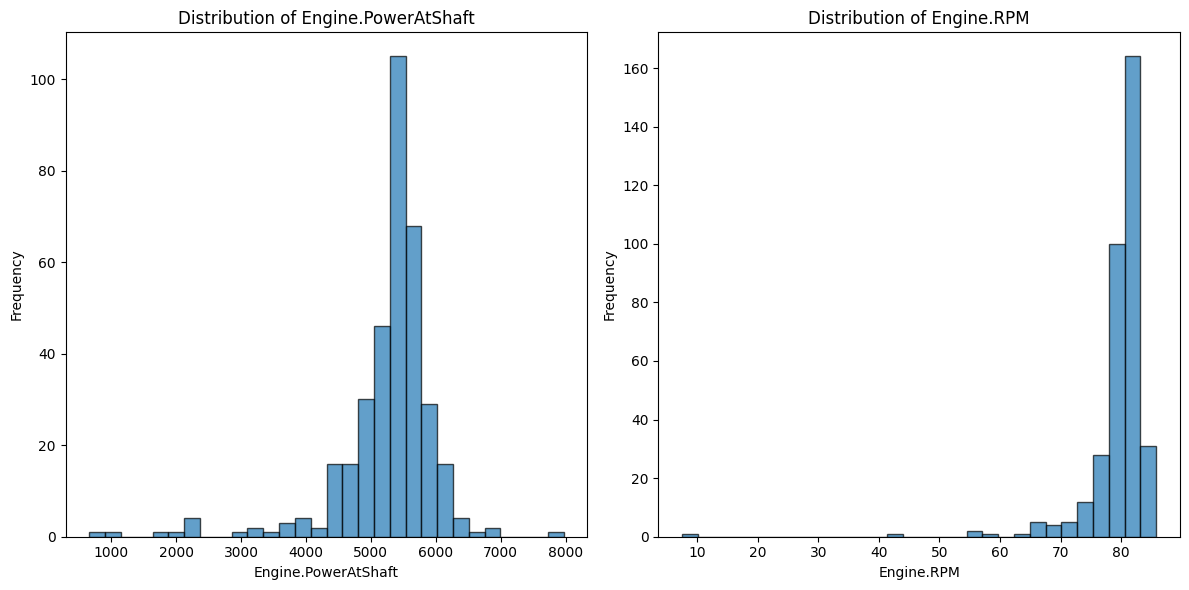

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"Engine_power_runn.csv"
data = pd.read_csv(file_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Engine.PowerAtShaft'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Engine.PowerAtShaft')
plt.xlabel('Engine.PowerAtShaft')
plt.ylabel('Frequency')

# Plot the histogram for Engine.RPM
plt.subplot(1, 2, 2)
plt.hist(data['Engine.RPM'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Engine.RPM')
plt.xlabel('Engine.RPM')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

mean_power_at_shaft = data['Engine.PowerAtShaft'].mean()
median_power_at_shaft = data['Engine.PowerAtShaft'].median()

mean_rpm = data['Engine.RPM'].mean()
median_rpm = data['Engine.RPM'].median()

print(f"Engine.PowerAtShaft - Mean: {mean_power_at_shaft}, Median: {median_power_at_shaft}")
print(f"Engine.RPM - Mean: {mean_rpm}, Median: {median_rpm}")

Engine.PowerAtShaft - Mean: 5271.967098591549, Median: 5400.0
Engine.RPM - Mean: 79.6087323943662, Median: 80.8


In [238]:
data['Engine.PowerAtShaft'].fillna(median_power_at_shaft, inplace=True)
data['Engine.RPM'].fillna(median_rpm, inplace=True)

data.to_csv(file_path, index=False)

print("Null values have been filled with the median.")

Null values have been filled with the median.


C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\1087978557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Engine.PowerAtShaft'].fillna(median_power_at_shaft, inplace=True)
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\1087978557.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [239]:
file_path = r"C:\Users\tarun\Downloads\Assignment_vessels\exp.csv"
data = pd.read_csv(file_path)
columns_to_fill = [
    'AuxiliaryBlowers', 'BoilerIsExhaustBypassActive', 'DraftAFT', 'DraftFWD', 'DraftMid',
    'WindDirectionIsVariable', 'Load.Cargo', 'Draft.BallastWater', 'Draft.DraftAft',
    'Draft.DraftFwd', 'Draft.DraftMid'
]
data[columns_to_fill] = data[columns_to_fill].fillna(method='ffill')
data.to_csv(file_path, index=False)
print("Missing data has been filled with the previous cell's data.")

Missing data has been filled with the previous cell's data.


C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2791377210.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[columns_to_fill] = data[columns_to_fill].fillna(method='ffill')
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2791377210.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_to_fill] = data[columns_to_fill].fillna(method='ffill')


In [240]:
xx = data['Longitude.Minutes'].isnull().sum()
print(f"Count of null values in 'Longitude.Minutes': {xx}")

Count of null values in 'Longitude.Minutes': 108


In [ ]:
data_cleaned = data.dropna(subset=['Longitude.Minutes'])

data_cleaned.to_csv(file_path, index=False)

In [ ]:
data['PerformanceCodes'] = data['PerformanceCodes'].replace('[]', pd.NA)
data['AuxiliaryBlowers'] = data['AuxiliaryBlowers'].replace('[]', pd.NA)
data['PerformanceCodes'] = data['PerformanceCodes'].fillna(method='ffill')
data['AuxiliaryBlowers'] = data['AuxiliaryBlowers'].fillna(method='ffill')

data.to_csv(file_path, index=False)

C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2056646809.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['PerformanceCodes'] = data['PerformanceCodes'].fillna(method='ffill')
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\2056646809.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['AuxiliaryBlowers'] = data['AuxiliaryBlowers'].fillna(method='ffill')


In [245]:
data['Containers'] = data['Containers'].fillna(method='ffill')
data['Reefers'] = data['Reefers'].fillna(method='ffill')

data.to_csv(file_path, index=False)

C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\1610387961.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Containers'] = data['Containers'].fillna(method='ffill')
C:\Users\tarun\AppData\Local\Temp\ipykernel_24124\1610387961.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Reefers'] = data['Reefers'].fillna(method='ffill')


In [253]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Final processed data is the final data